# VAR

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


In [4]:
df.head()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


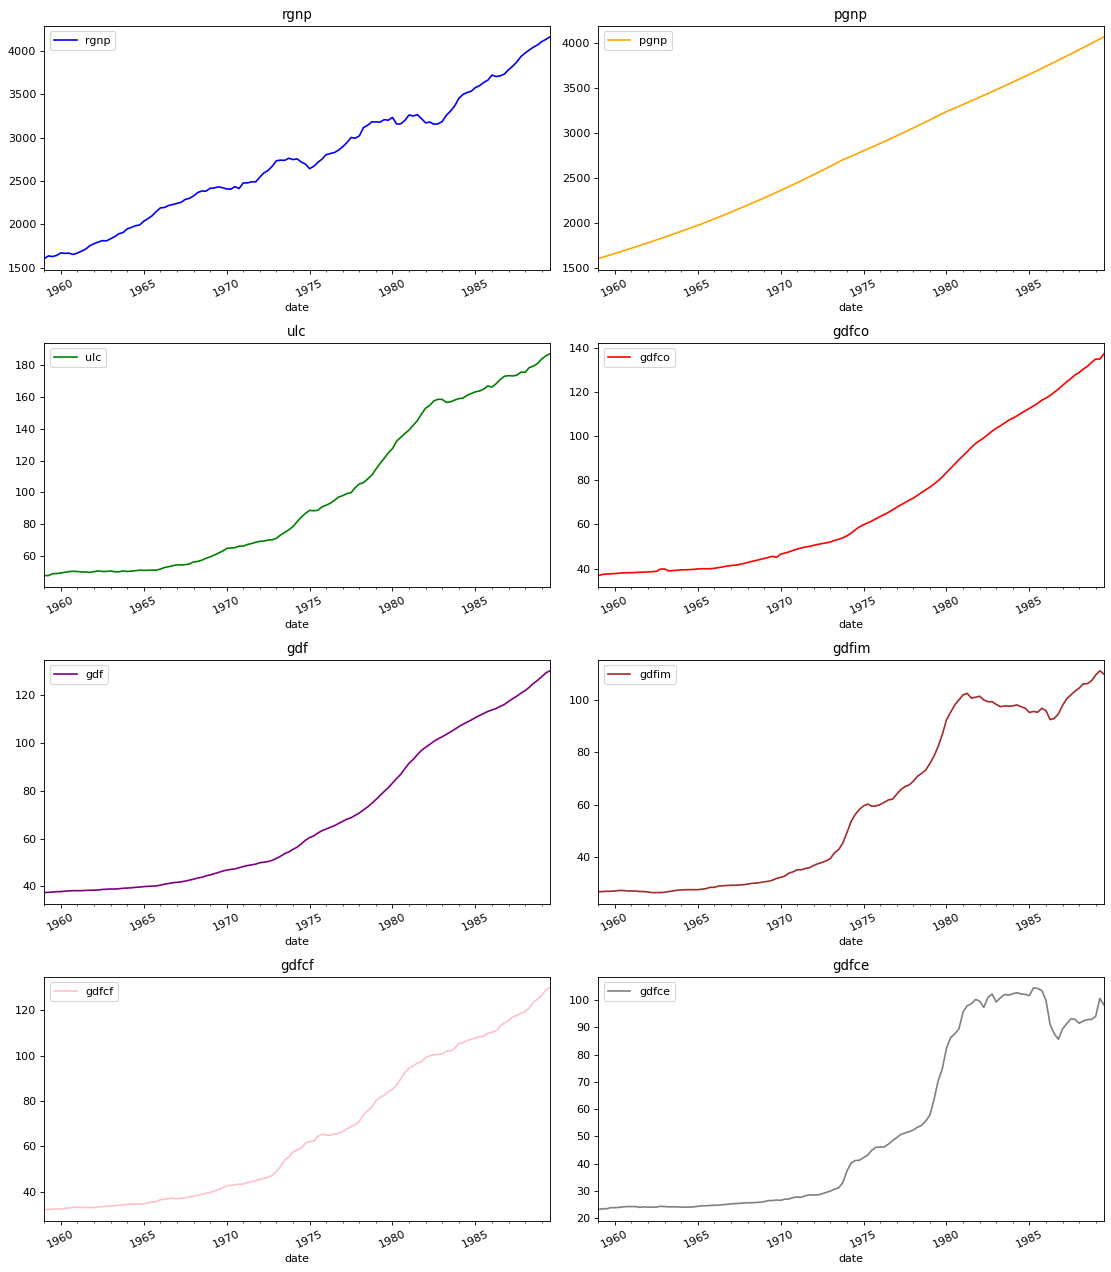

In [5]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

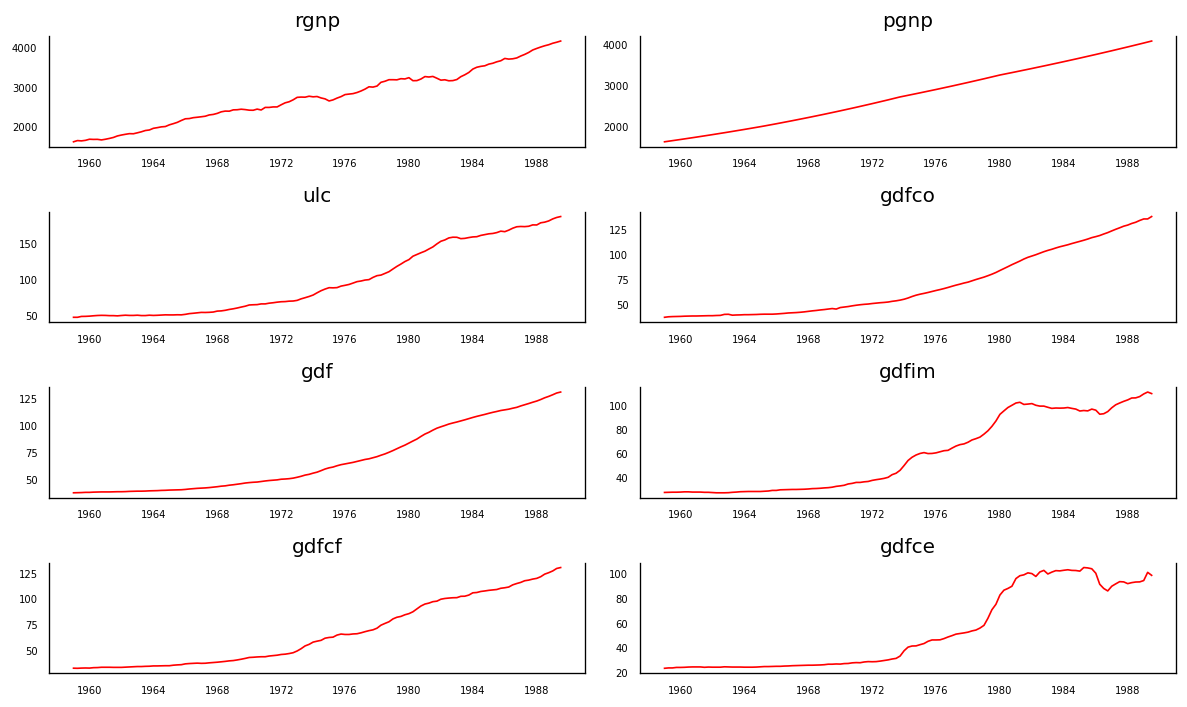

In [6]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [7]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [8]:
grangers_causation_matrix(df, variables = df.columns)  

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\st

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


So how to read the above output?

The row are the Response (Y) and the columns are the predictor series (X).

For example, if you take the value 0.0003 in (row 1, column 2), it refers to the p-value of pgnp_x causing rgnp_y. Whereas, the 0.000 in (row 2, column 1) refers to the p-value of rgnp_y causing pgnp_x.

So, how to interpret the p-values?

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

For example, P-Value of 0.0003 at (row 1, column 2) represents the p-value of the Grangers Causality test for pgnp_x causing rgnp_y, which is less that the significance level of 0.05.

So, you can reject the null hypothesis and conclude pgnp_x causes rgnp_y.

Looking at the P-Values in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.

This makes this system of multi time series a good candidate for using VAR models to forecast.

Next, let’s do the Cointegration test.

7. Cointegration Test

In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rgnp   ::  248.0     > 143.6691  =>   True
pgnp   ::  183.12    > 111.7797  =>   True
ulc    ::  130.01    > 83.9383   =>   True
gdfco  ::  85.28     > 60.0627   =>   True
gdf    ::  55.05     > 40.1749   =>   True
gdfim  ::  31.59     > 24.2761   =>   True
gdfcf  ::  14.06     > 12.3212   =>   True
gdfce  ::  0.45      > 4.1296    =>   False


8. Split the Series into Training and Testing Data

In [13]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(119, 8)
(4, 8)


9. Check for Stationarity and Make the Time Series Stationary

In [15]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [16]:
df_train

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1987-07-01,3872.8,3877.7,173.9,126.0,119.6,101.9,117.7,93.1
1987-10-01,3935.6,3901.0,175.8,127.6,120.8,103.3,118.7,92.9
1988-01-01,3974.8,3924.5,175.7,128.7,121.9,104.5,119.4,91.5


In [17]:
# ADF Test on each column
for name, column in df_train.items():  # Remplacement de iteritems() par items()
    adfuller_test(column, name=name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.5428
 No. Lags Chosen       = 2
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.9861. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.1556
 No. Lags Chosen       = 1
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.9957. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. N

In [18]:
for i in range(len(df_train.columns)):
  result = adfuller(df_train[df_train.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df_train.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df_train.columns[i]))

rgnp - Series is not Stationary
pgnp - Series is not Stationary
ulc - Series is not Stationary
gdfco - Series is not Stationary
gdf - Series is not Stationary
gdfim - Series is not Stationary
gdfcf - Series is not Stationary
gdfce - Series is not Stationary


In [19]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df_train.columns)):
    result = kpss(df_train[df_train.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df_train.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df_train.columns[i]))

rgnp - Series is not Stationary
pgnp - Series is not Stationary
ulc - Series is not Stationary
gdfco - Series is not Stationary
gdf - Series is not Stationary
gdfim - Series is not Stationary
gdfcf - Series is not Stationary
gdfce - Series is not Stationary


C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\3621410755.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_train[df_train.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\3621410755.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_train[df_train.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\3621410755.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_train[df_train.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\3621410755.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available

In [20]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [21]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3448
 No. Lags Chosen       = 1
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8282
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.3666. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

In [22]:
for i in range(len(df_differenced.columns)):
  result = adfuller(df_differenced[df_differenced.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df_differenced.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df_differenced.columns[i]))

rgnp - Series is Stationary
pgnp - Series is not Stationary
ulc - Series is Stationary
gdfco - Series is not Stationary
gdf - Series is not Stationary
gdfim - Series is Stationary
gdfcf - Series is not Stationary
gdfce - Series is Stationary


In [23]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df_differenced.columns)):
    result = kpss(df_differenced[df_differenced.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df_differenced.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df_differenced.columns[i]))

rgnp - Series is Stationary
pgnp - Series is not Stationary
ulc - Series is not Stationary
gdfco - Series is not Stationary
gdf - Series is not Stationary
gdfim - Series is Stationary
gdfcf - Series is not Stationary
gdfce - Series is Stationary


C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\1418571166.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df_differenced[df_differenced.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\1418571166.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_differenced[df_differenced.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\1418571166.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_differenced[df_differenced.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\1418571166.py:3: InterpolationWarning: The test statistic is outsid

In [24]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [25]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0123
 No. Lags Chosen       = 2
 Critical value 1%     = -3.489
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.9813
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 T

In [26]:
for i in range(len(df_differenced.columns)):
  result = adfuller(df_differenced[df_differenced.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df_differenced.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df_differenced.columns[i]))

rgnp - Series is Stationary
pgnp - Series is Stationary
ulc - Series is Stationary
gdfco - Series is Stationary
gdf - Series is Stationary
gdfim - Series is Stationary
gdfcf - Series is Stationary
gdfce - Series is Stationary


In [27]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df_differenced.columns)):
    result = kpss(df_differenced[df_differenced.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df_differenced.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df_differenced.columns[i]))

rgnp - Series is Stationary
pgnp - Series is Stationary
ulc - Series is Stationary
gdfco - Series is Stationary
gdf - Series is Stationary
gdfim - Series is Stationary
gdfcf - Series is Stationary
gdfce - Series is Stationary


C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\1418571166.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df_differenced[df_differenced.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\1418571166.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df_differenced[df_differenced.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\1418571166.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df_differenced[df_differenced.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\1418571166.py:3: InterpolationWarning: The test statistic is outsid

10. How to Select the Order (P) of VAR model

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

In [29]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -1.3679402315450677
BIC :  0.34118471465888245
FPE :  0.2552682517347194
HQIC:  -0.6741331335699567 

Lag Order = 2
AIC :  -1.6212373944478267
BIC :  1.6249432095295822
FPE :  0.20113494371371338
HQIC:  -0.303628882679595 

Lag Order = 3
AIC :  -1.7658008387012791
BIC :  3.0345473163767833
FPE :  0.18125103746164364
HQIC:  0.18239143783963296 

Lag Order = 4
AIC :  -2.000735164470318
BIC :  4.3712151376540875
FPE :  0.15556966521481097
HQIC:  0.5849359332771069 

Lag Order = 5
AIC :  -1.961953560836398
BIC :  5.999364562242093
FPE :  0.1869279438911484
HQIC:  1.2682063311783303 

Lag Order = 6
AIC :  -2.330338652482907
BIC :  7.238452689088579
FPE :  0.16380374017443636
HQIC:  1.5514371669548055 

Lag Order = 7
AIC :  -2.5923313523471254
BIC :  8.602387254937799
FPE :  0.18238685837154206
HQIC:  1.9483069621146587 

Lag Order = 8
AIC :  -3.3172619764582087
BIC :  9.522195810323026
FPE :  0.15573163248209032
HQIC:  1.889607138622095 

Lag Order = 9
AIC :  -4.8047631

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [30]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-0.07898,0.1232,0.9241,0.002961
1,-0.5721,1.248,0.5662,0.1653
2,-0.8256,2.612,0.4482,0.5674
3,-1.007,4.048,0.3937,1.042
4,-1.255,5.418,0.3399,1.449
5,-1.230,7.060,0.4147,2.129
6,-1.739,8.169,0.3286,2.276
7,-2.142,9.384,0.3340,2.528
8,-2.964,10.18,0.2744,2.362
9,-4.562,10.20,0.1413,1.420


Train the VAR Model of Selected Order(p)

In [32]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Mar, 2025
Time:                     17:41:47
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    4.37122
Nobs:                     113.000    HQIC:                  0.584936
Log likelihood:          -905.679    FPE:                   0.155570
AIC:                     -2.00074    Det(Omega_mle):       0.0200322
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            2.430021         2.677505            0.908           0.364
L1.rgnp         -0.750066         0.159023           -4.717           0.000
L1.pgnp         -0.095621         4.938865           -0.019           0.985
L1.ul

12. Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [34]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)  # Calcul de Durbin-Watson

for col, val in zip(df.columns, out):  # Boucle sur les variables
    print(col, ':', round(val, 2))  # Affiche le résultat


rgnp : 2.09
pgnp : 2.02
ulc : 2.17
gdfco : 2.05
gdf : 2.25
gdfim : 1.99
gdfcf : 2.2
gdfce : 2.17


13. How to Forecast VAR model using statsmodels

In order to forecast, the VAR model expects up to the lag order number of observations from the past data.

This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [36]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

4


In [37]:
# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

array([[ 13.5,   0.1,   1.4,   0.1,   0.1,  -0.1,   0.4,  -2. ],
       [-23.6,   0.2,  -2. ,  -0.5,  -0.1,  -0.2,  -0.3,  -1.2],
       [ -3.3,   0.1,   3.1,   0.5,   0.3,   0.4,   0.9,   2.2],
       [ -3.9,   0.2,  -2.1,  -0.4,   0.2,  -1.5,   0.9,  -0.3]])

Let’s forecast.

In [39]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1988-10-01,48.322456,1.250774,0.595993,0.265657,-0.104146,0.304119,-0.917227,-0.113061
1989-01-01,-34.962286,-0.387966,-0.329877,-0.042217,0.164633,1.357223,0.618163,3.029975
1989-04-01,20.392680,0.291298,0.390812,-0.134488,-0.486073,-0.149551,-1.238234,-2.345223
1989-07-01,-37.416599,-0.280943,0.367912,0.102797,0.333371,-0.502103,0.469468,0.517424


The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data.

In this case it is two times.

14. Invert the transformation to get the real forecast

In [42]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [43]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

,rgnp_forecast,pgnp_forecast,ulc_forecast,gdfco_forecast,gdf_forecast,gdfim_forecast,gdfcf_forecast,gdfce_forecast
date,,,,,,,,
1988-10-01,4123.022456,3996.950774,181.095993,132.965657,126.395854,106.604119,125.082773,93.186939
1989-01-01,4168.382626,4021.613582,182.262108,134.389097,128.056341,108.365461,127.283708,96.603854
1989-04-01,4234.135476,4046.567687,183.819036,135.678050,129.230756,109.977252,128.246409,97.675545
1989-07-01,4262.471728,4071.240850,185.743875,137.069799,130.738542,111.086940,129.678579,99.264661


15. Plot of Forecast vs Actuals

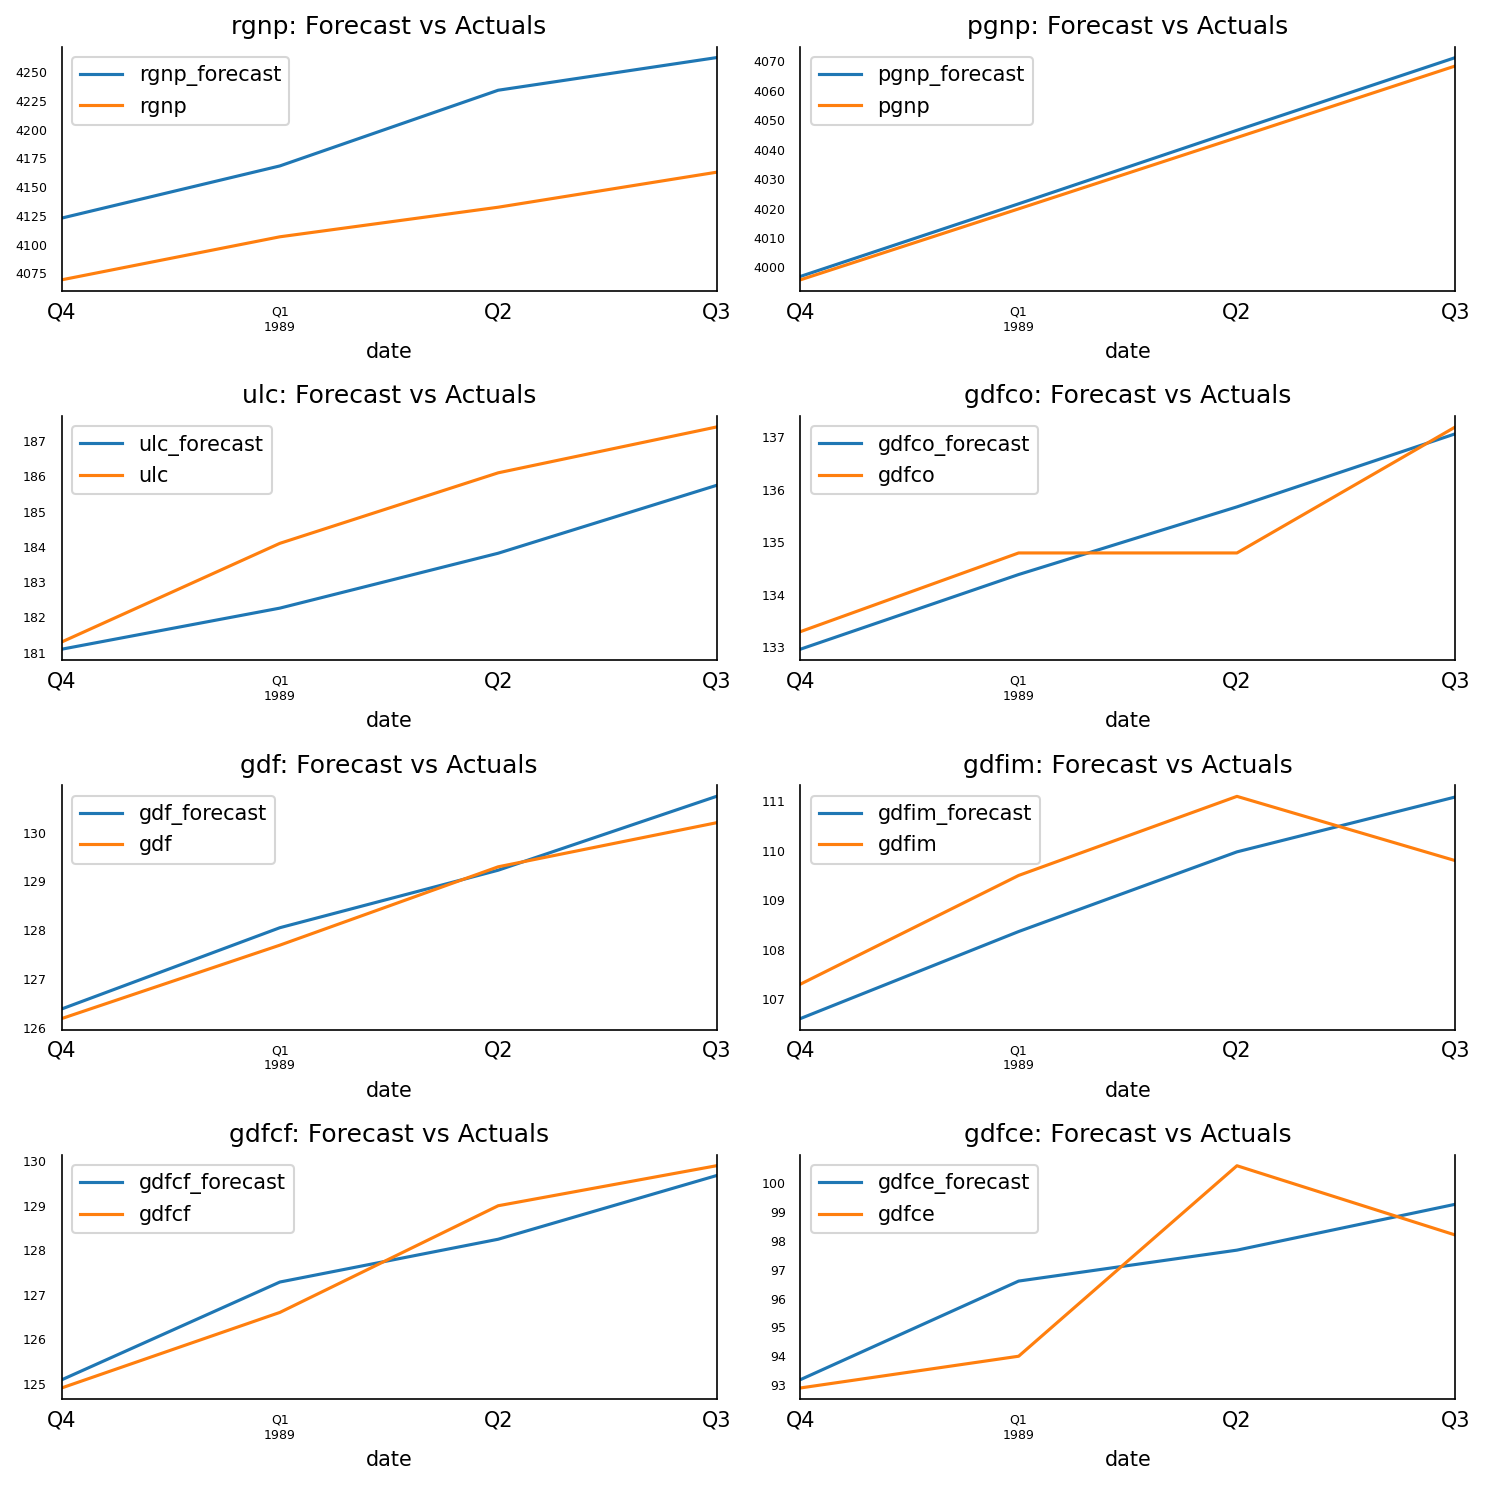

In [45]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

16. Evaluate the Forecasts

To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax

In [47]:
# Exemple d'affichage des résultats pour chaque variable
print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v, 4))  # Remplace `adjust(k)` par `k`

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['pgnp_forecast'].values, df_test['pgnp'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v, 4))

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v, 4))

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v, 4))

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v, 4))

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v, 4))

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v, 4))

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v, 4))


Forecast Accuracy of: rgnp


NameError: name 'forecast_accuracy' is not defined

# VECM

In [48]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


In [50]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 123 entries, 1959-01-01 to 1989-07-01
Series name: gdfce
Non-Null Count  Dtype  
--------------  -----  
123 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [60]:
df.columns

Index(['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce'], dtype='object')

In [64]:
df.isna().sum()

rgnp     0
pgnp     0
ulc      0
gdfco    0
gdf      0
gdfim    0
gdfcf    0
gdfce    0
dtype: int64

<Axes: xlabel='date'>

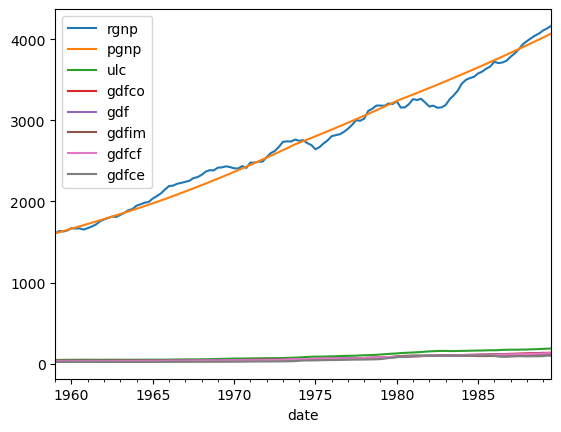

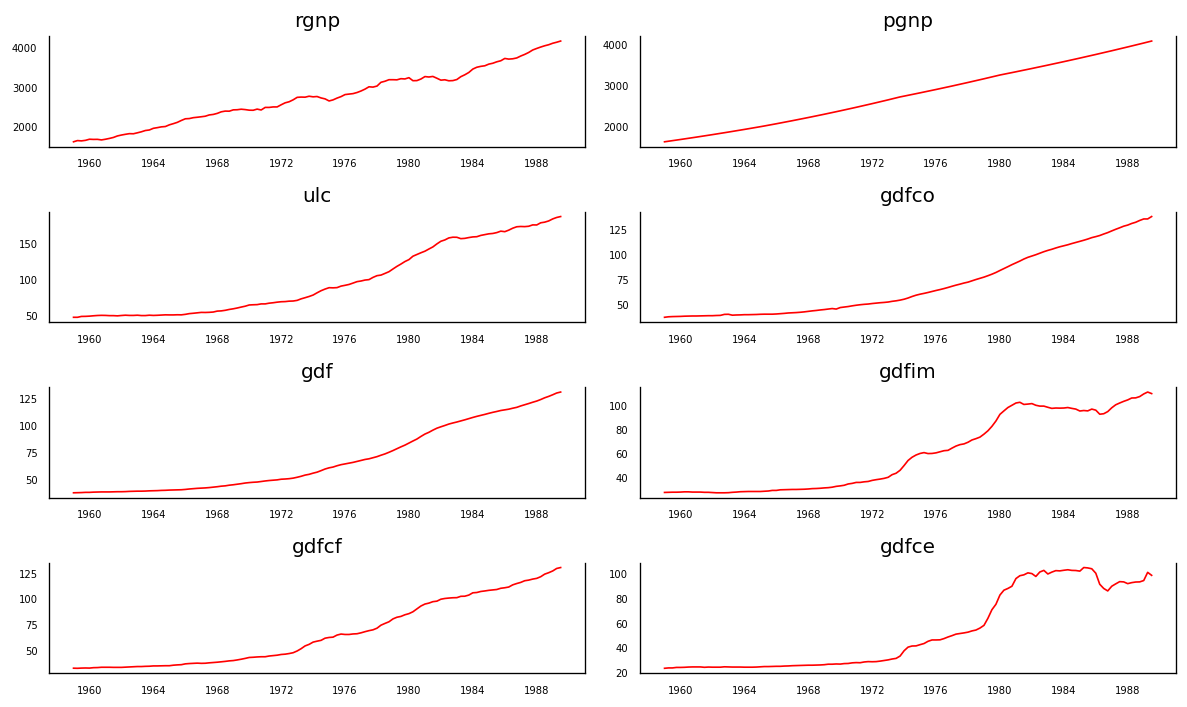

In [72]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

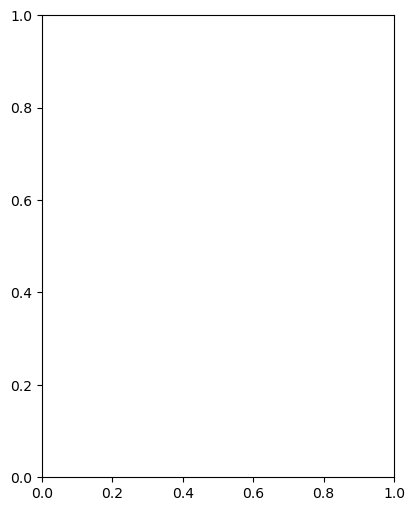

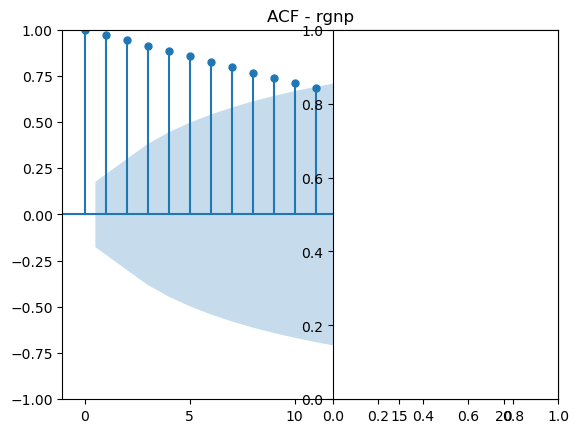

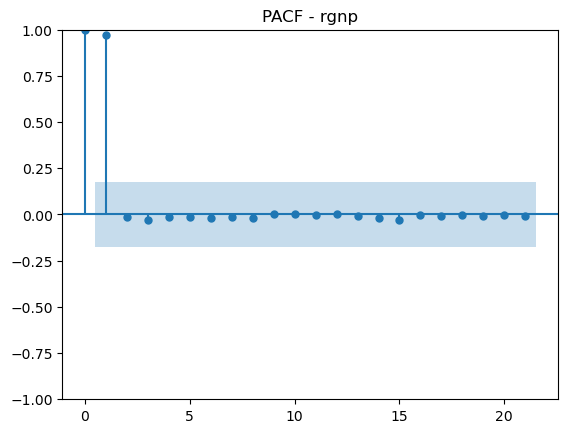

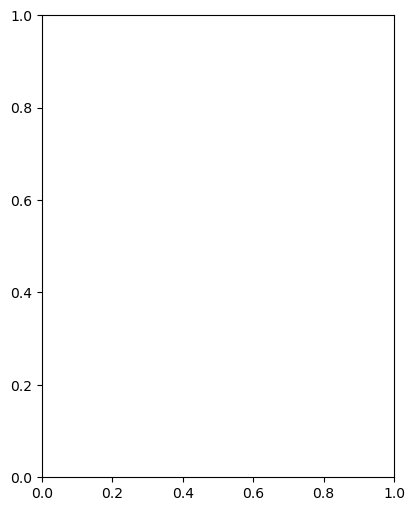

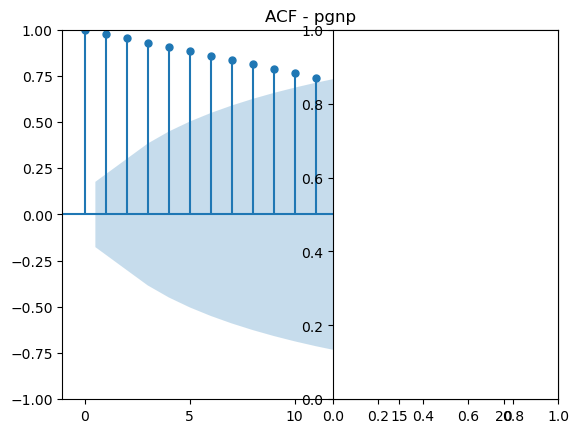

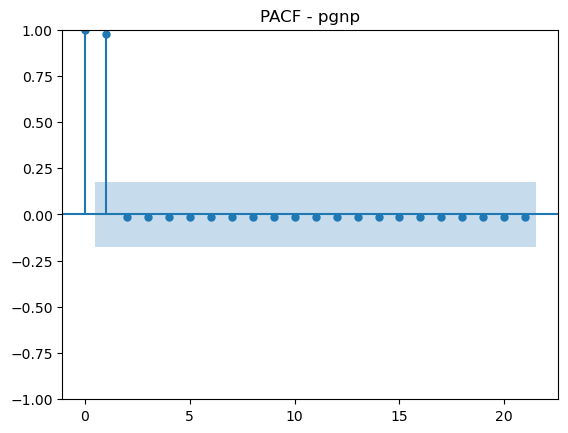

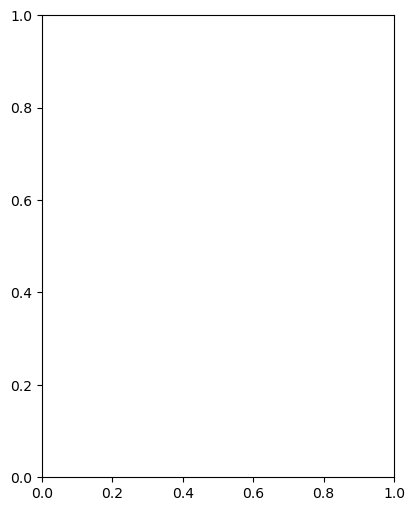

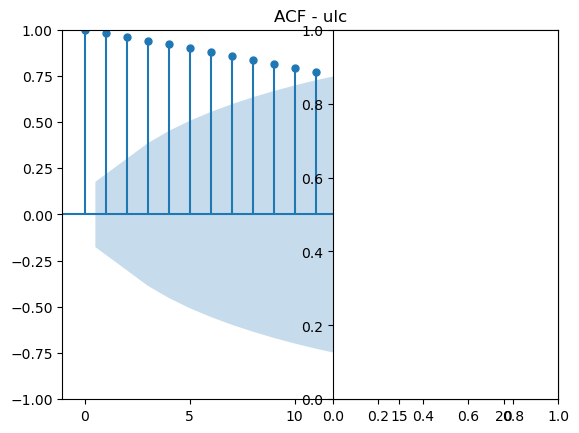

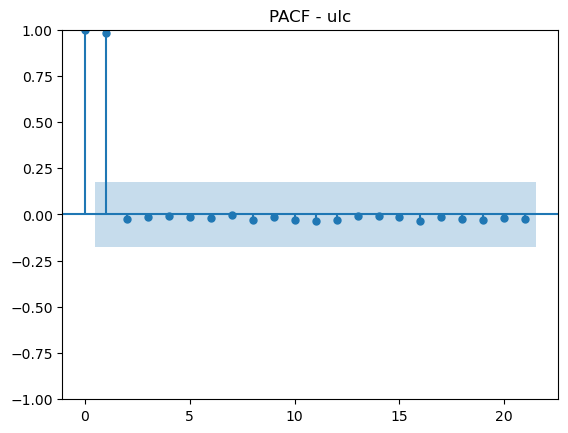

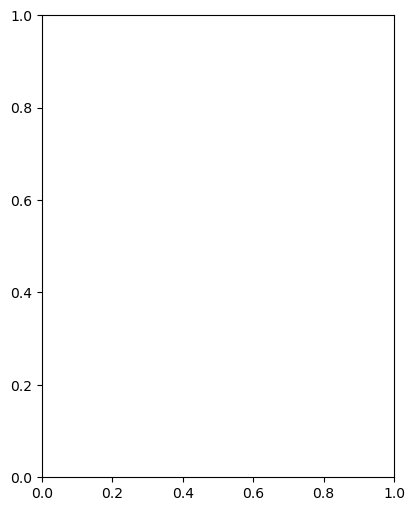

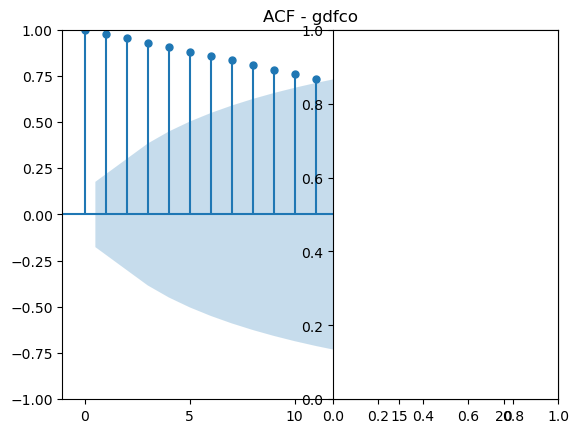

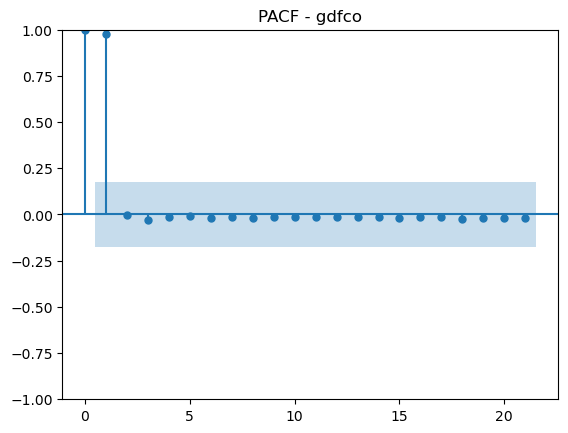

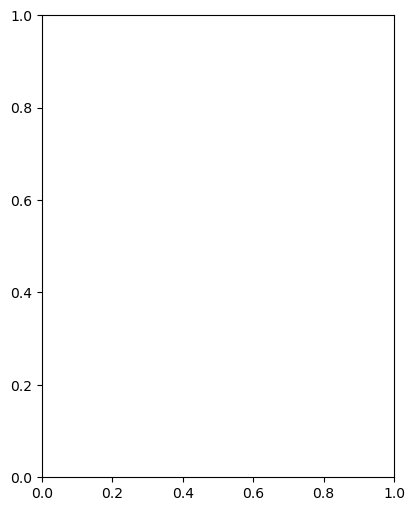

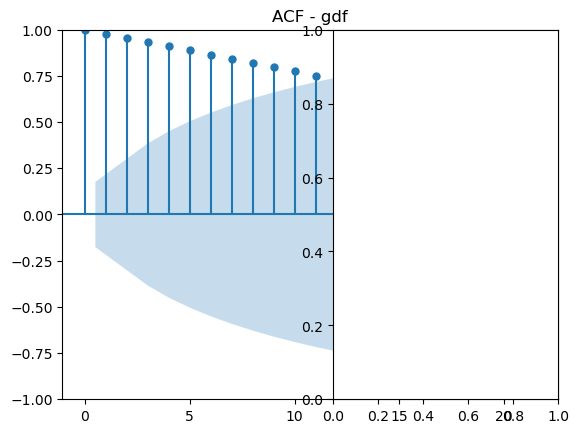

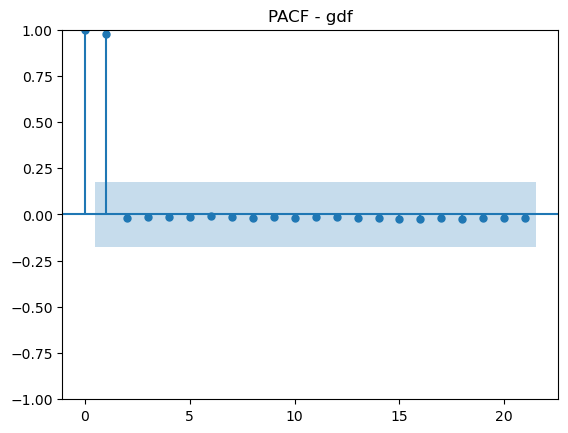

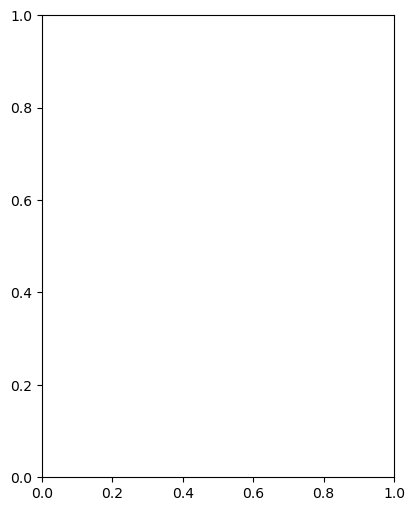

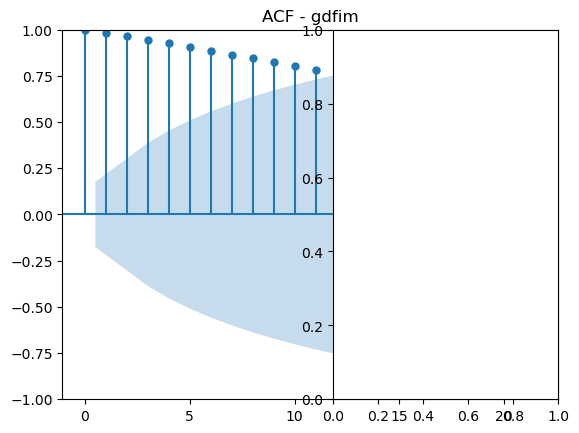

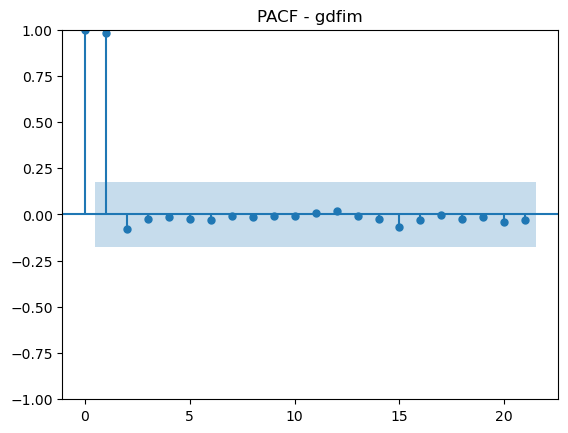

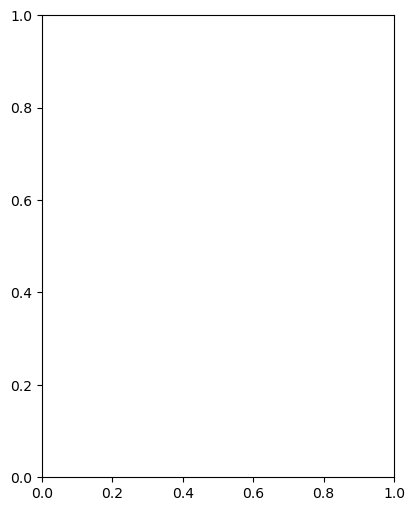

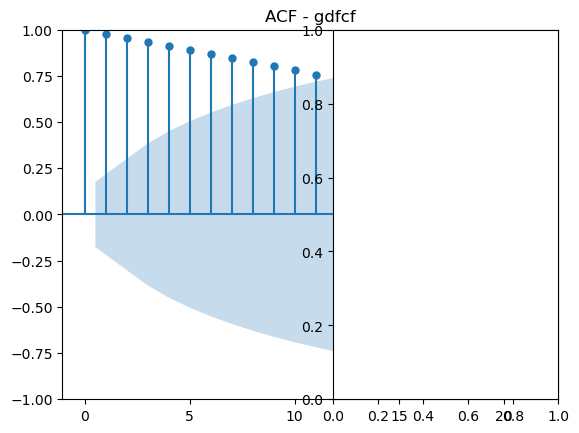

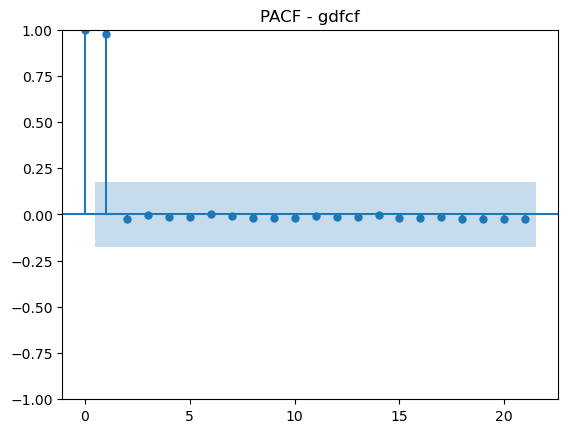

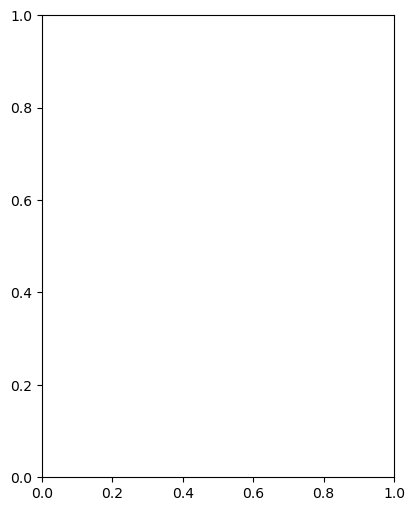

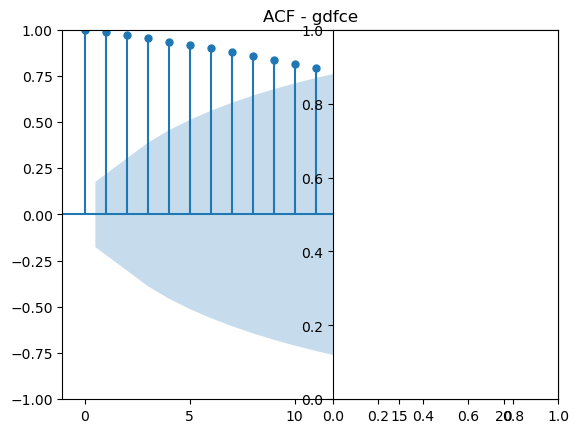

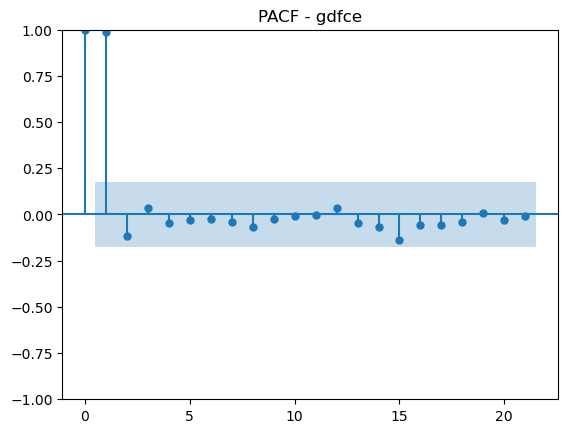

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plot_acf(df[col].dropna(),title=f"ACF - {col}")
    plt.subplot(1, 2, 2)
    plot_pacf(df[col].dropna(),title=f"PACF - {col}")
    plt.show()

In [78]:
# stationarité
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

rgnp - Series is not Stationary
pgnp - Series is not Stationary
ulc - Series is not Stationary
gdfco - Series is not Stationary
gdf - Series is not Stationary
gdfim - Series is not Stationary
gdfcf - Series is not Stationary
gdfce - Series is not Stationary


In [80]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df.columns)):
    result = kpss(df[df.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df.columns[i]))

rgnp - Series is not Stationary
pgnp - Series is not Stationary
ulc - Series is not Stationary
gdfco - Series is not Stationary
gdf - Series is not Stationary
gdfim - Series is not Stationary
gdfcf - Series is not Stationary
gdfce - Series is not Stationary


C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-

In [82]:
# 1st difference
df_differenced = df.diff().dropna()

In [86]:
df = df_differenced.copy()

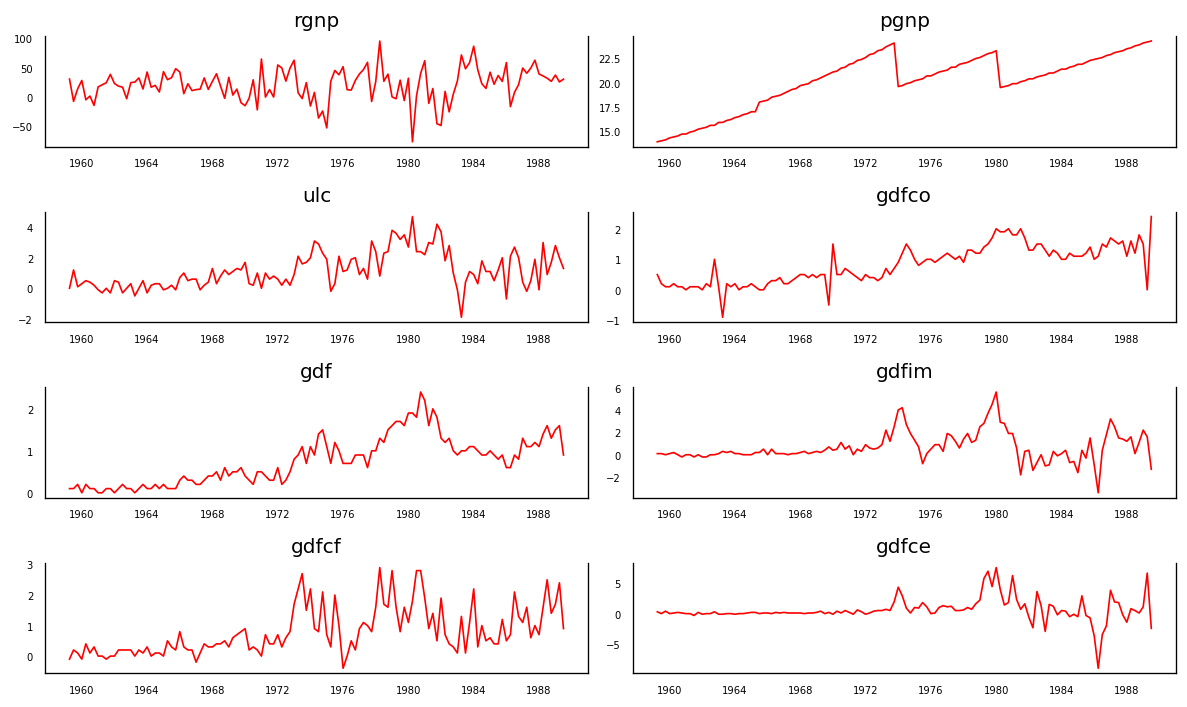

In [88]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

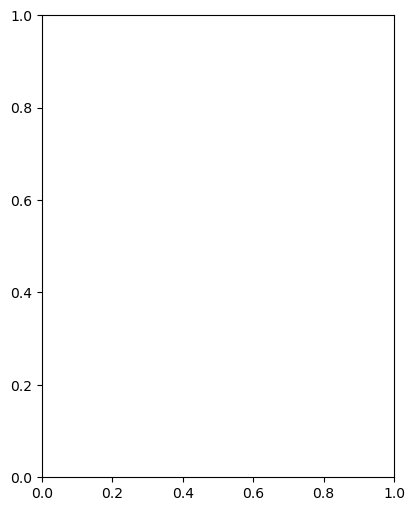

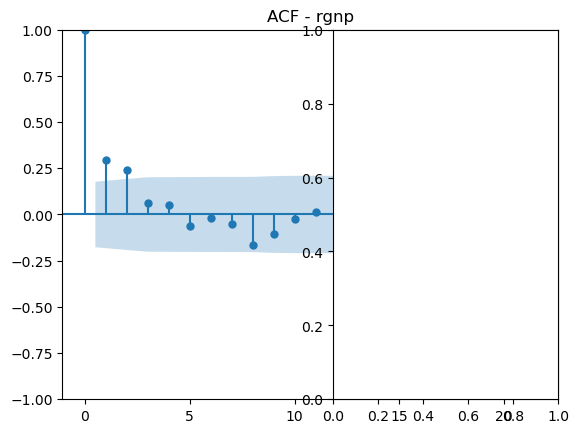

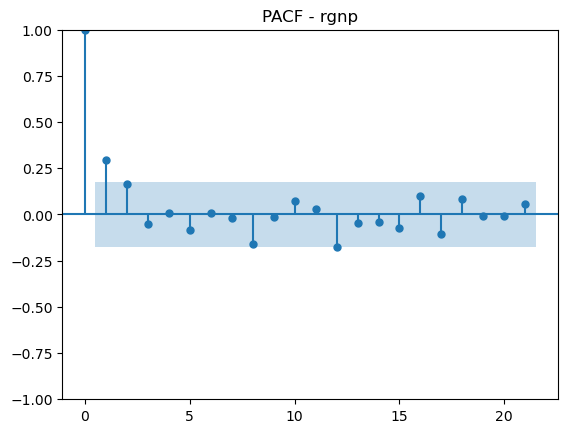

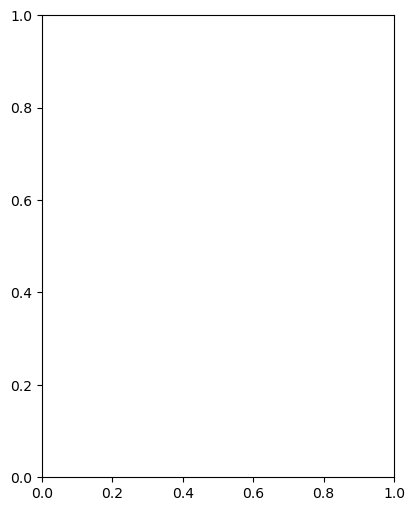

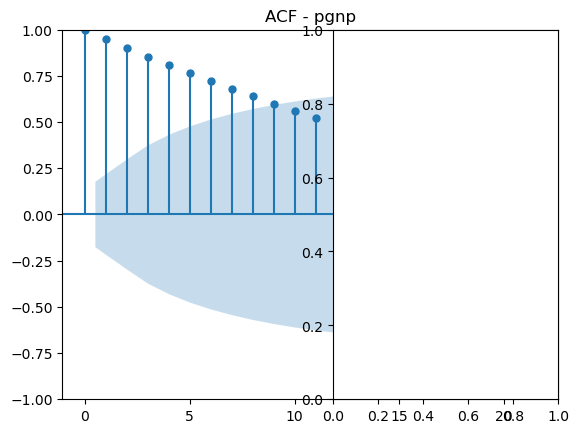

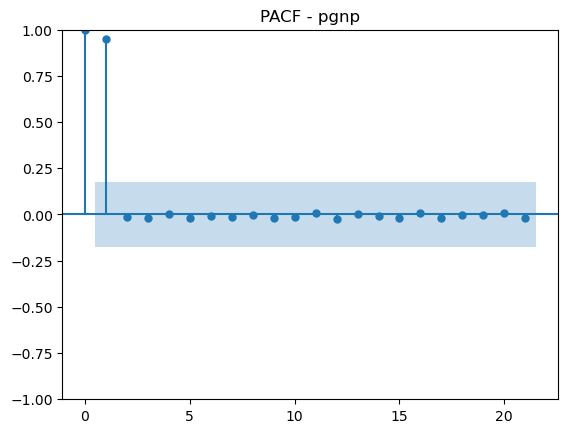

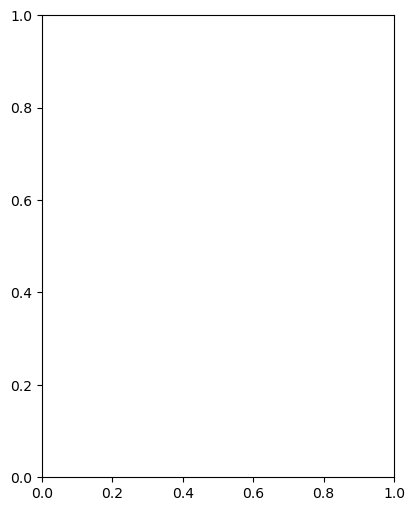

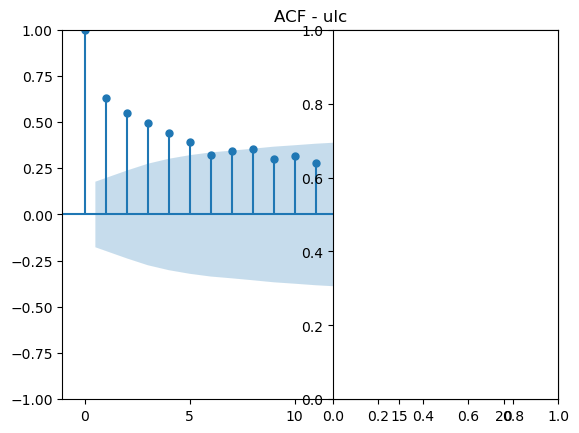

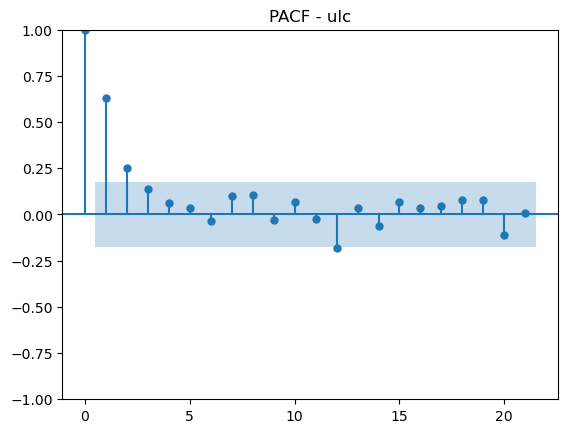

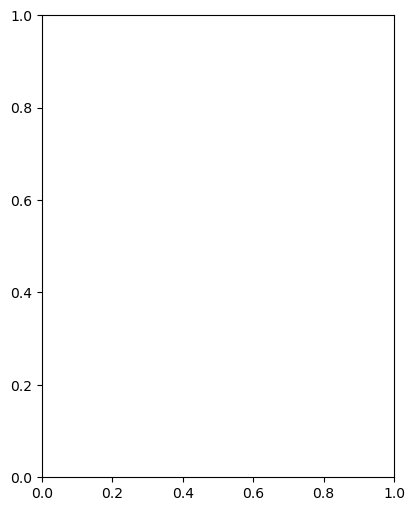

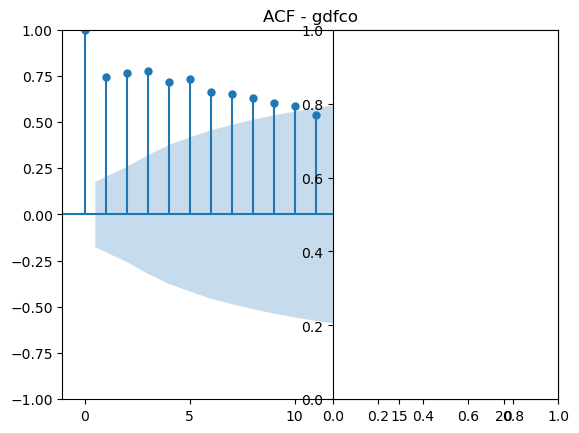

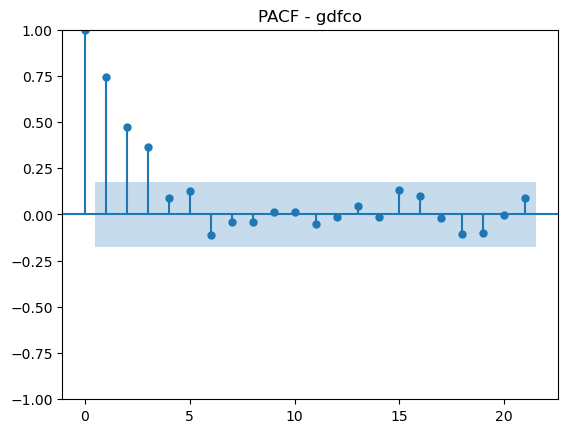

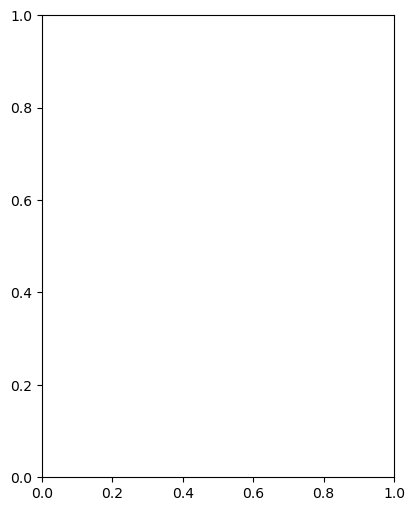

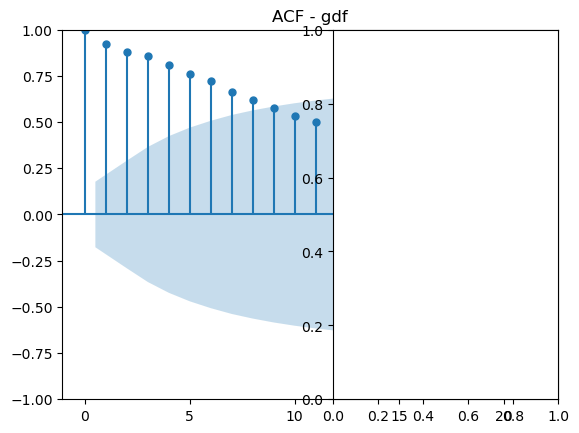

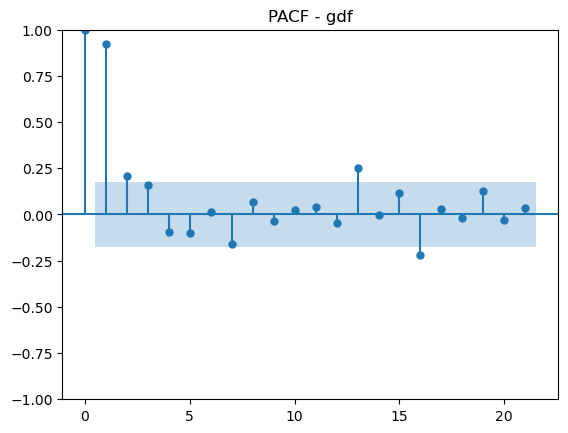

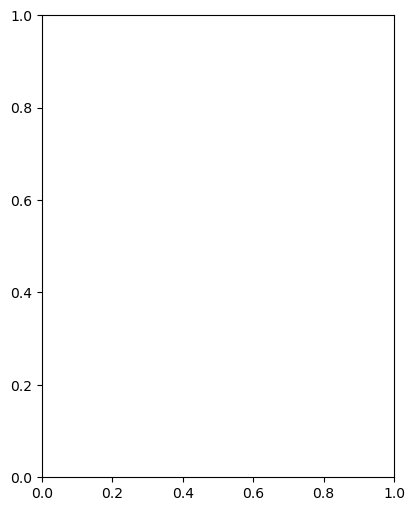

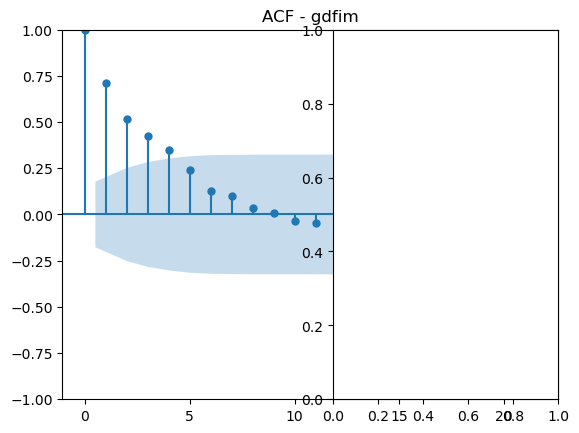

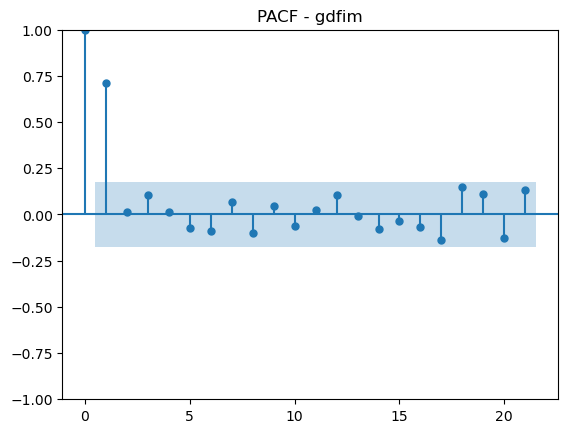

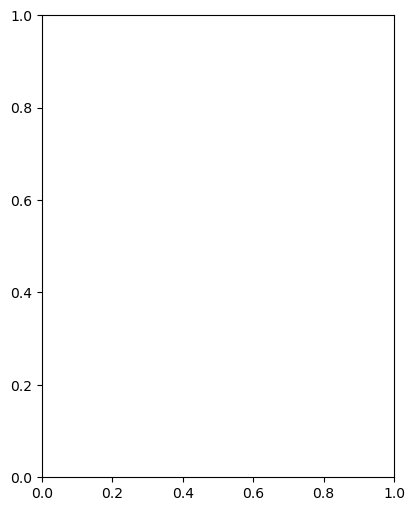

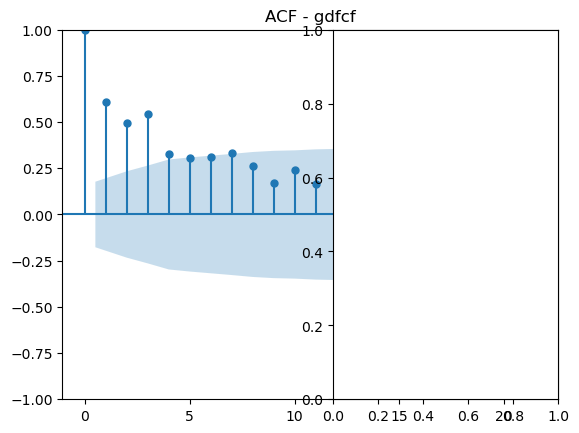

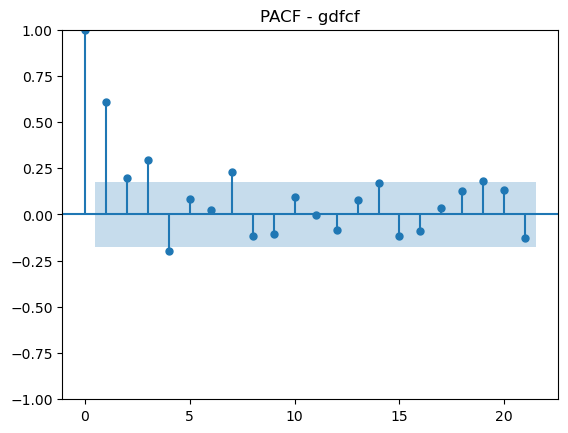

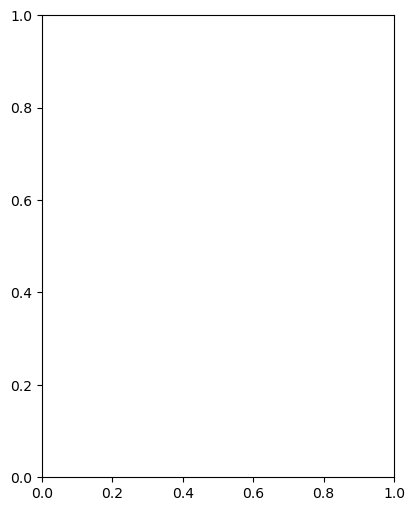

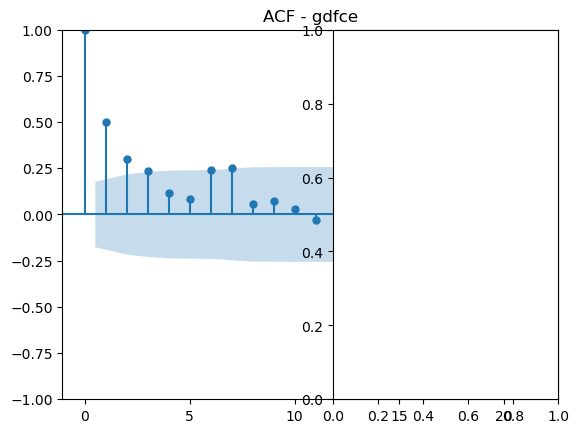

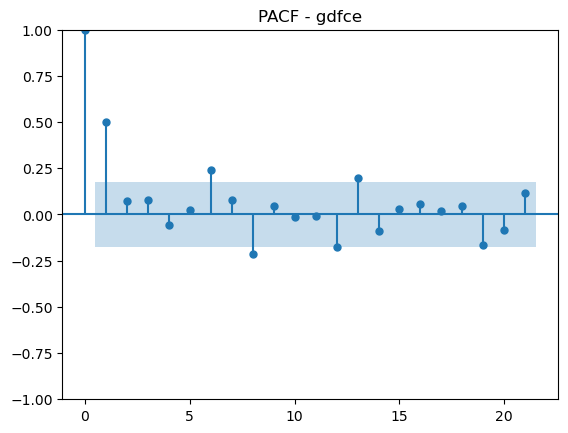

In [92]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plot_acf(df[col].dropna(),title=f"ACF - {col}")
    plt.subplot(1, 2, 2)
    plot_pacf(df[col].dropna(),title=f"PACF - {col}")
    plt.show()

In [94]:
# stationarité
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

rgnp - Series is Stationary
pgnp - Series is not Stationary
ulc - Series is Stationary
gdfco - Series is not Stationary
gdf - Series is not Stationary
gdfim - Series is Stationary
gdfcf - Series is not Stationary
gdfce - Series is not Stationary


In [96]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df.columns)):
    result = kpss(df[df.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df.columns[i]))

rgnp - Series is Stationary
pgnp - Series is not Stationary
ulc - Series is not Stationary
gdfco - Series is not Stationary
gdf - Series is not Stationary
gdfim - Series is Stationary
gdfcf - Series is not Stationary
gdfce - Series is Stationary


C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-

In [98]:
# 2st difference
df_differenced = df.diff().dropna()

In [100]:
df = df_differenced.copy()

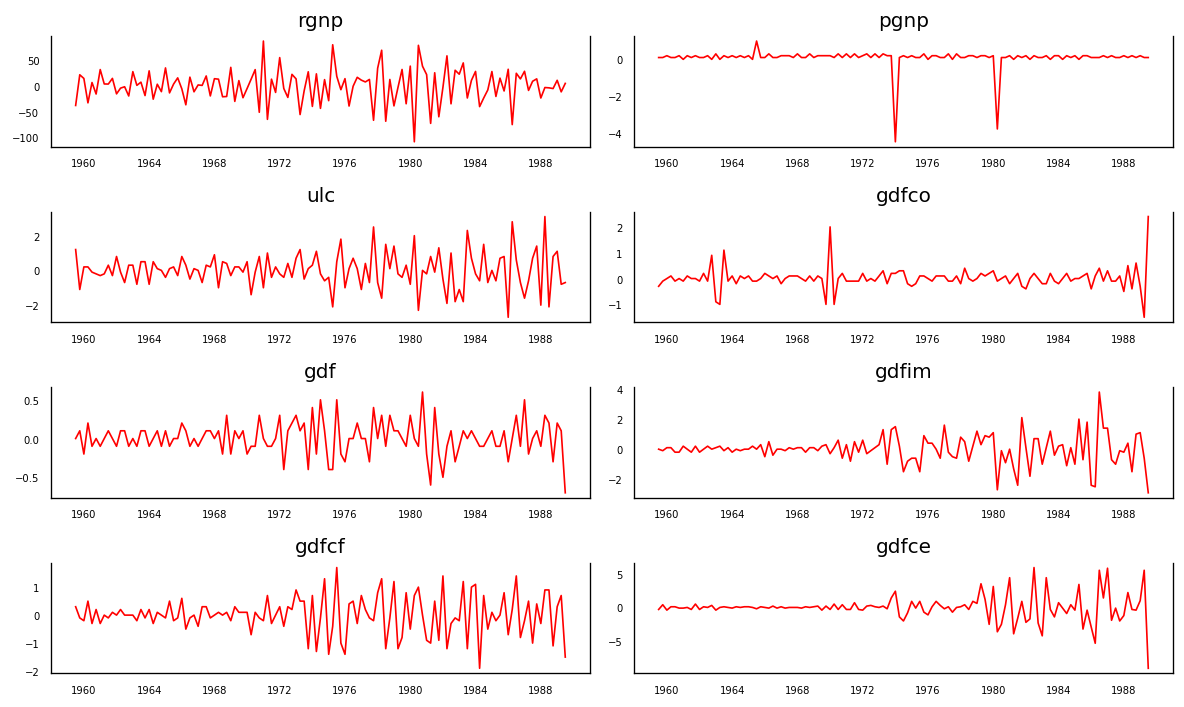

In [104]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

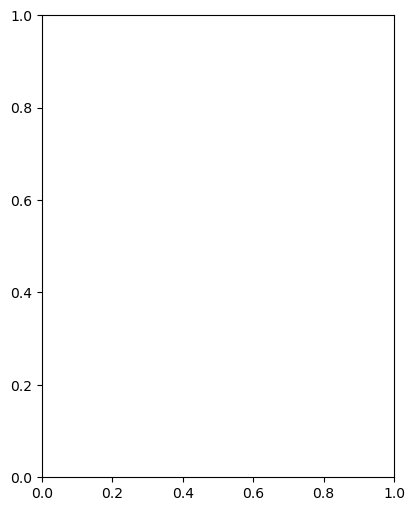

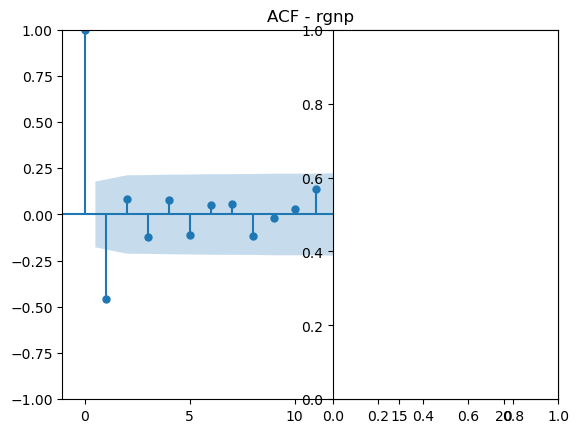

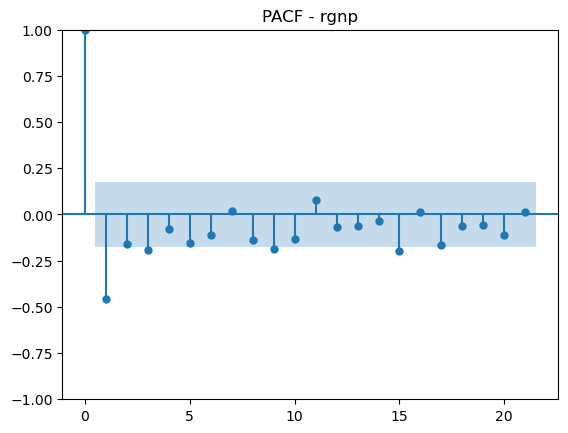

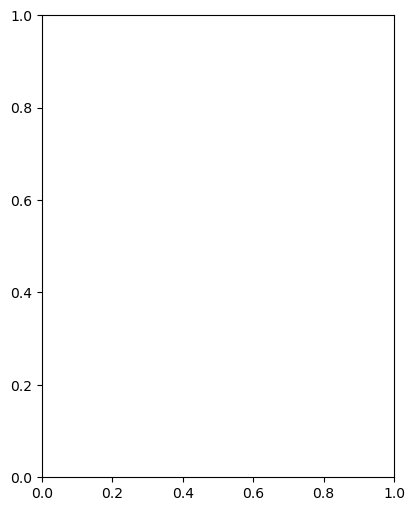

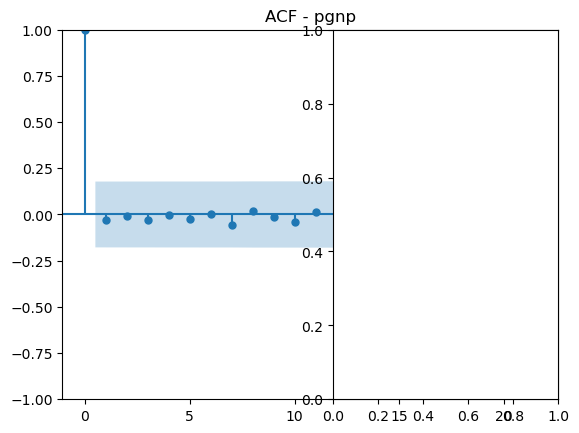

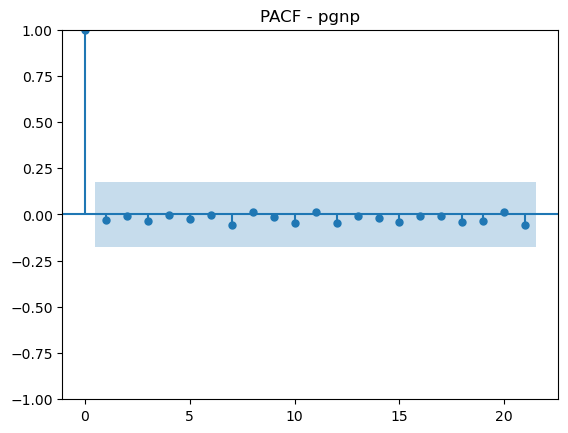

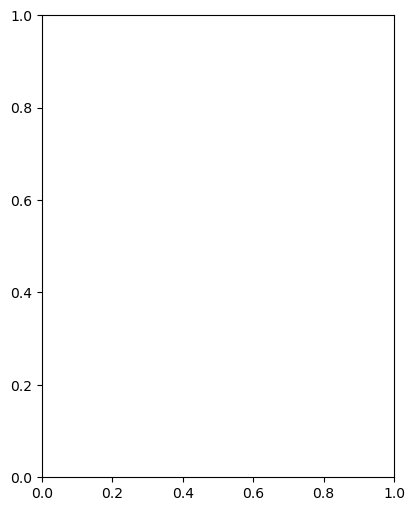

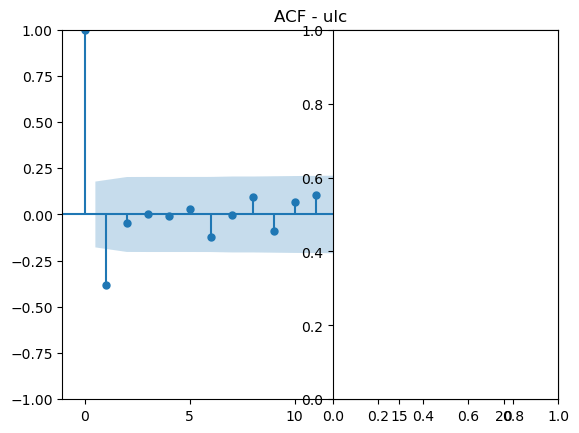

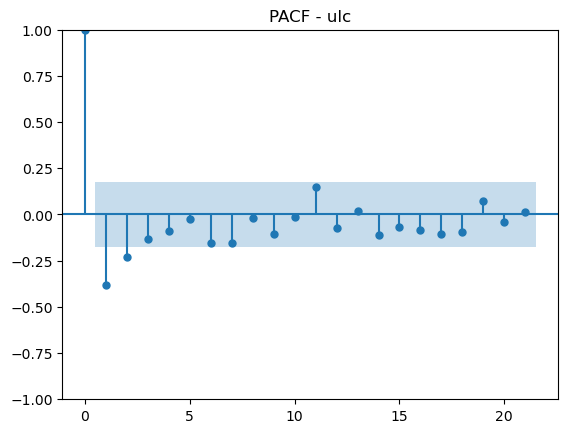

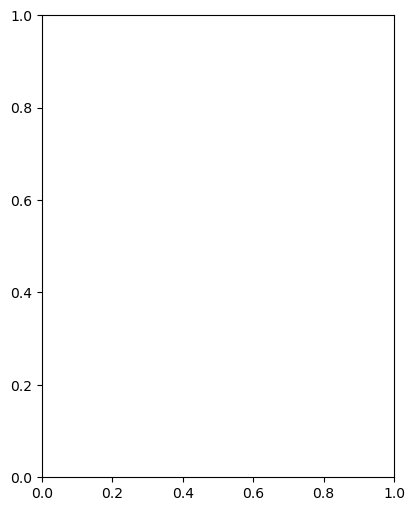

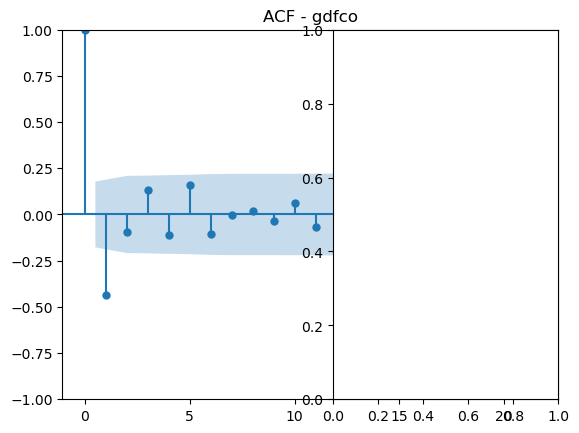

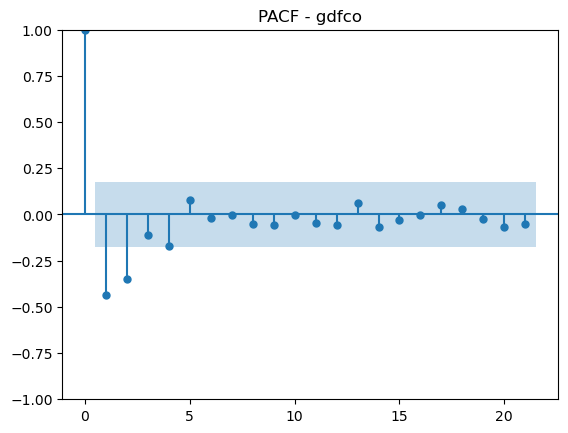

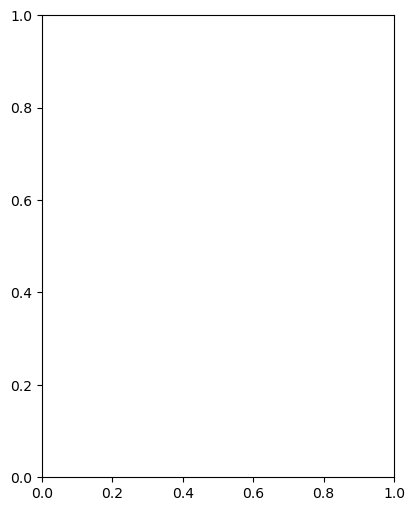

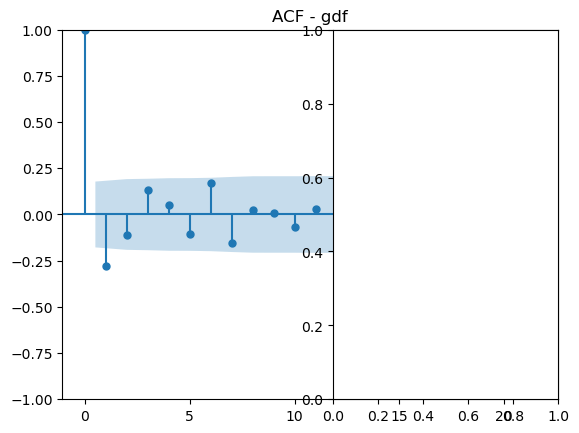

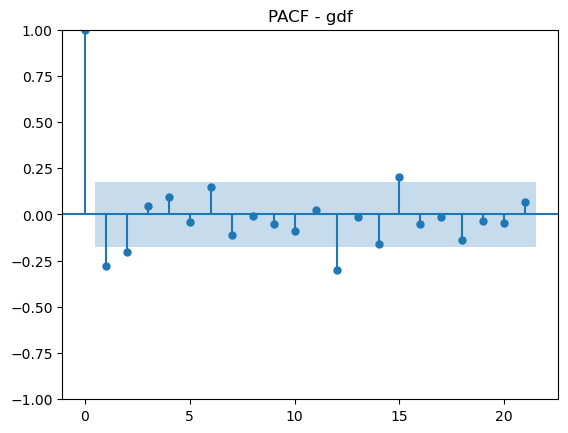

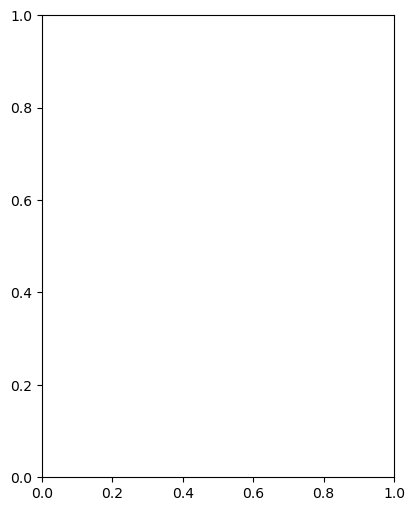

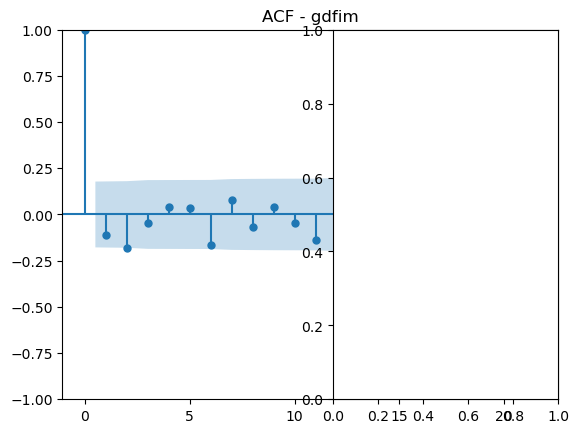

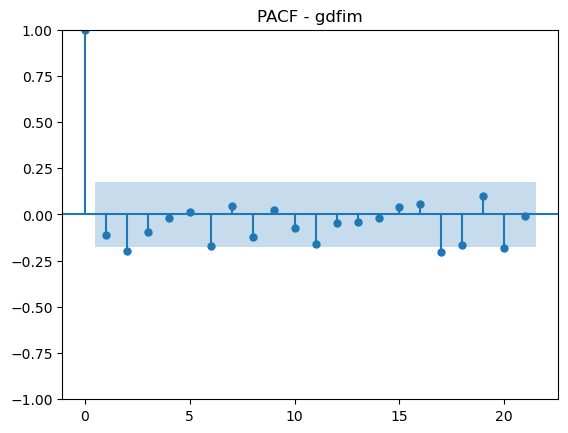

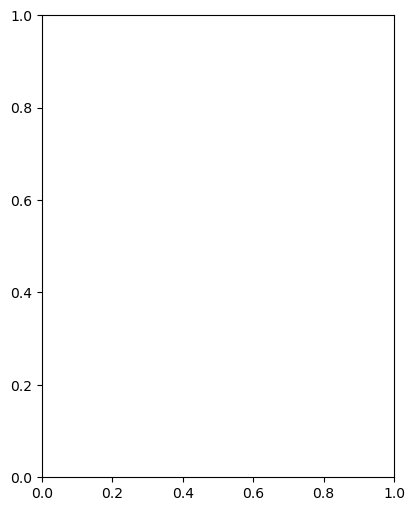

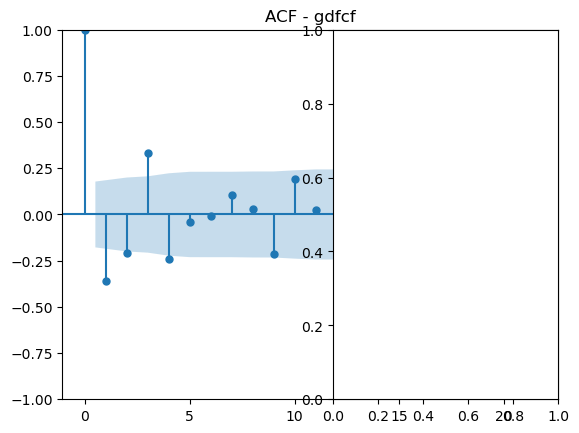

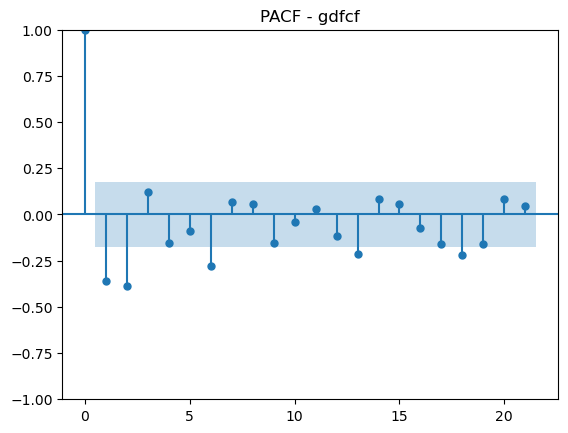

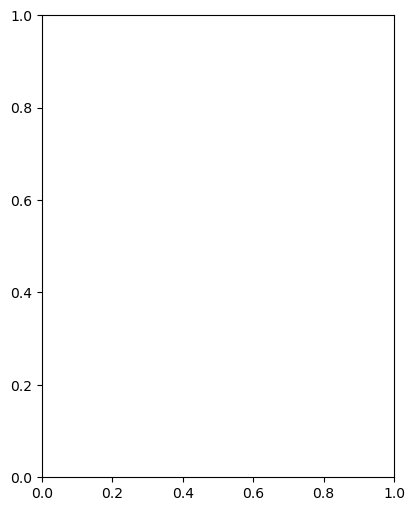

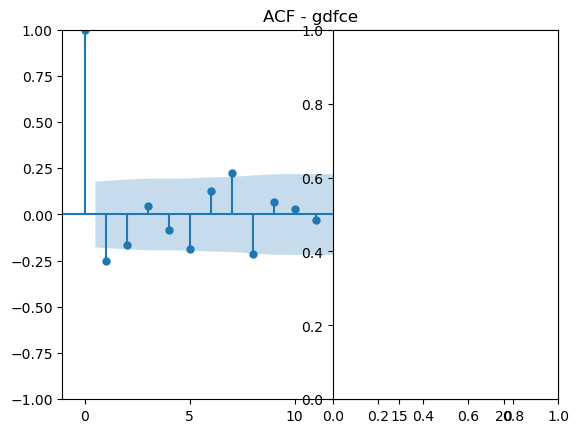

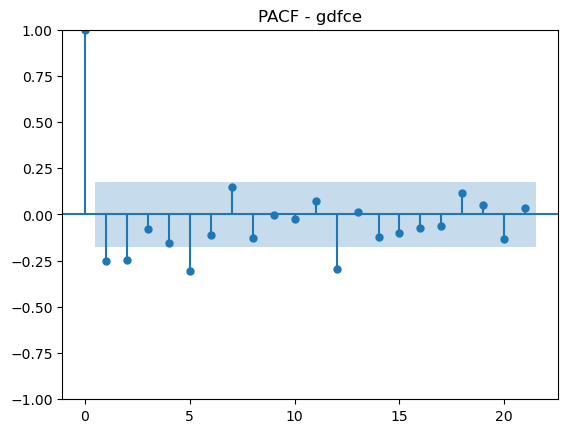

In [102]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plot_acf(df[col].dropna(),title=f"ACF - {col}")
    plt.subplot(1, 2, 2)
    plot_pacf(df[col].dropna(),title=f"PACF - {col}")
    plt.show()

In [106]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

rgnp - Series is Stationary
pgnp - Series is Stationary
ulc - Series is Stationary
gdfco - Series is Stationary
gdf - Series is Stationary
gdfim - Series is Stationary
gdfcf - Series is Stationary
gdfce - Series is Stationary


In [108]:
for i in range (len(df.columns)):
    result = kpss(df[df.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df.columns[i]))

rgnp - Series is Stationary
pgnp - Series is Stationary
ulc - Series is Stationary
gdfco - Series is Stationary
gdf - Series is Stationary
gdfim - Series is Stationary
gdfcf - Series is Stationary
gdfce - Series is Stationary


C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\193605240.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\193605240.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\193605240.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_17224\193605240.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-valu

In [110]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df) 

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rgnp   ::  436.28    > 143.6691  =>   True
pgnp   ::  332.43    > 111.7797  =>   True
ulc    ::  250.4     > 83.9383   =>   True
gdfco  ::  178.64    > 60.0627   =>   True
gdf    ::  119.24    > 40.1749   =>   True
gdfim  ::  71.87     > 24.2761   =>   True
gdfcf  ::  40.17     > 12.3212   =>   True
gdfce  ::  15.22     > 4.1296    =>   True


In [112]:
df.columns

Index(['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce'], dtype='object')

In [122]:
from statsmodels.tsa.vector_ar.vecm import VECM,select_order, select_coint_rank

# sélection du meilleur ordre

order_result = select_order(df[['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce']].dropna(),maxlags=12,deterministic ="ci",seasons=4)
order_result.summary()

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

,AIC,BIC,FPE,HQIC
0,0.2904,2.873,1.350,1.338
1,-0.08176,4.090,0.9592,1.610
2,-0.3460,5.416,0.7882,1.990
3,-0.5639,6.787,0.7168,2.417
4,-0.4814,8.459,0.9516,3.144
5,-1.024,9.506,0.7535,3.246
6,-1.623,10.50,0.6557,3.291
7,-2.326,11.38,0.6394,3.233
8,-3.877,11.42,0.3702,2.326
9,-5.539,11.35,0.3283,1.308


In [124]:
# 6 Estimation du modele 

rank_test = select_coint_rank(df[['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce']], det_order=0, k_ar_diff=3,method="trace",signif=0.05)
print(rank_test)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   8          507.4          159.5
  1   8          385.4          125.6
  2   8          305.2          95.75
  3   8          225.9          69.82
  4   8          163.2          47.85
  5   8          109.6          29.80
  6   8          60.60          15.49
  7   8          28.80          3.841
-------------------------------------


In [126]:
rank_test.rank

8

In [130]:
model = VECM(df,deterministic ="ci",k_ar_diff=order_result.selected_orders['aic'], coint_rank = rank_test.rank) #=8
model_fit = model.fit()

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [132]:
# affichage du sommaire
print(model_fit.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation rgnp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.rgnp       -0.2377      0.582     -0.408      0.683      -1.379       0.904
L1.pgnp        9.7772      3.051      3.204      0.001       3.797      15.757
L1.ulc       -42.9245     13.877     -3.093      0.002     -70.123     -15.726
L1.gdfco     215.7121     34.075      6.331      0.000     148.926     282.498
L1.gdf      -143.0311     48.019     -2.979      0.003    -237.147     -48.915
L1.gdfim     -82.1960      7.025    -11.700      0.000     -95.965     -68.427
L1.gdfcf     249.2647     24.789     10.056      0.000     200.680     297.850
L1.gdfce       9.9484      6.361      1.564      0.118      -2.518      22.415
L2.rgnp       -0.9731      0.546     -1.783      0.075      -2.043       0.096
L2.pgnp       27.8468      2.806      9.924    

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:1582: RuntimeWarning: invalid value encountered in sqrt
  last_rows_1d = np.sqrt(np.diag(mat1.dot(mat2)))


--- Résultats du test de Ljung-Box ---
              lag_1         lag_2         lag_3         lag_4         lag_5  \
rgnp   1.145705e-05  3.594317e-07  5.817963e-07  1.294030e-07  1.541851e-07   
pgnp   1.700625e-19  3.717859e-29  9.517880e-35  2.489010e-38  5.707178e-40   
ulc    1.736017e-11  8.050770e-18  3.128181e-22  3.791550e-24  2.651251e-26   
gdfco  5.089038e-06  9.046742e-10  6.366010e-11  5.502843e-12  4.867979e-12   
gdf    3.416645e-05  2.771509e-07  2.087443e-07  1.798584e-08  2.214018e-08   
gdfim  1.518896e-07  2.999755e-12  4.744702e-14  2.983551e-15  1.170756e-15   
gdfcf  1.080473e-08  1.443949e-11  7.140869e-14  5.993450e-15  5.527620e-17   
gdfce  9.821017e-05  5.246884e-07  3.304594e-07  7.824830e-08  9.345882e-08   

              lag_6         lag_7         lag_8         lag_9        lag_10  \
rgnp   3.448434e-07  9.325228e-07  1.944037e-06  1.047349e-06  3.110475e-07   
pgnp   7.009800e-40  3.822922e-39  1.554668e-38  1.989553e-38  1.169387e-38   
ulc    5.458

<Figure size 1000x500 with 0 Axes>

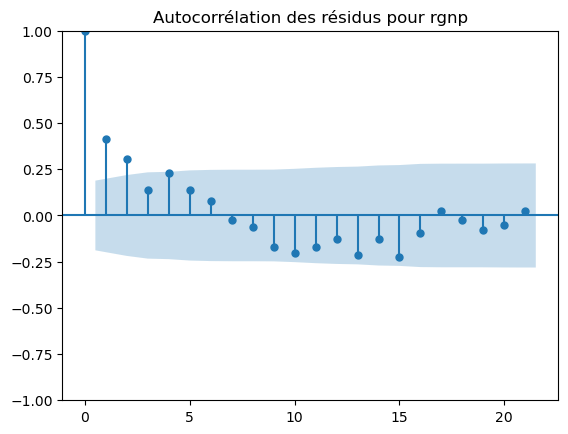

<Figure size 1000x500 with 0 Axes>

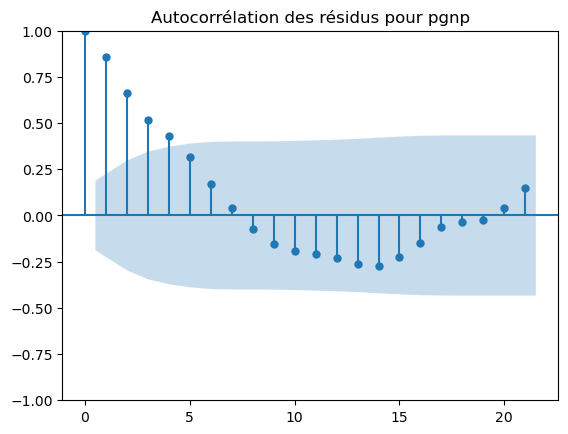

<Figure size 1000x500 with 0 Axes>

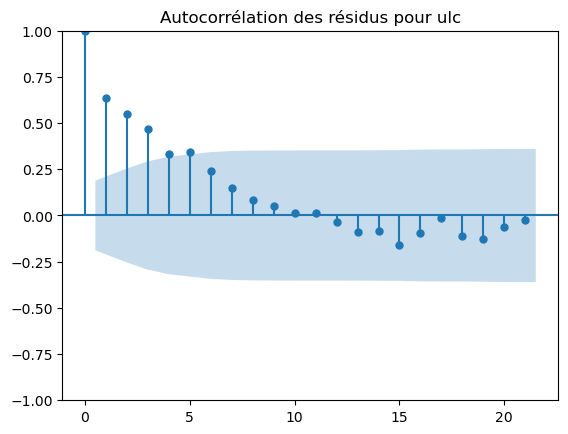

<Figure size 1000x500 with 0 Axes>

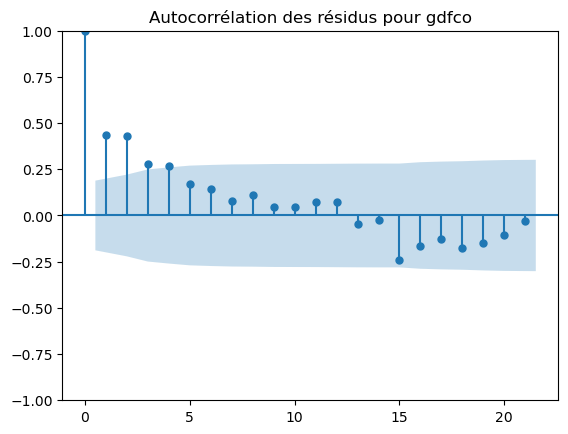

<Figure size 1000x500 with 0 Axes>

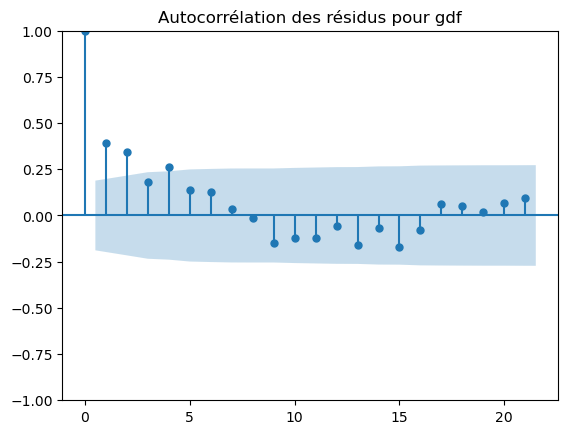

<Figure size 1000x500 with 0 Axes>

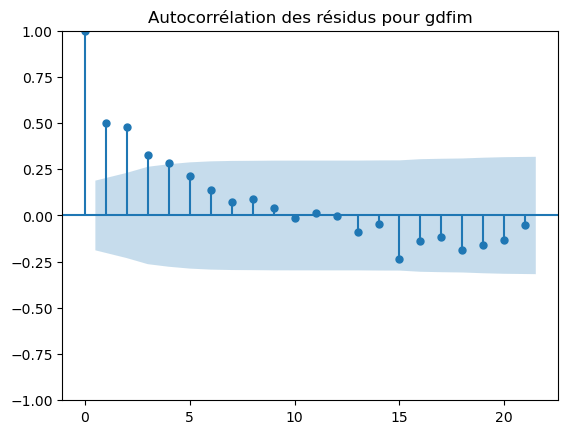

<Figure size 1000x500 with 0 Axes>

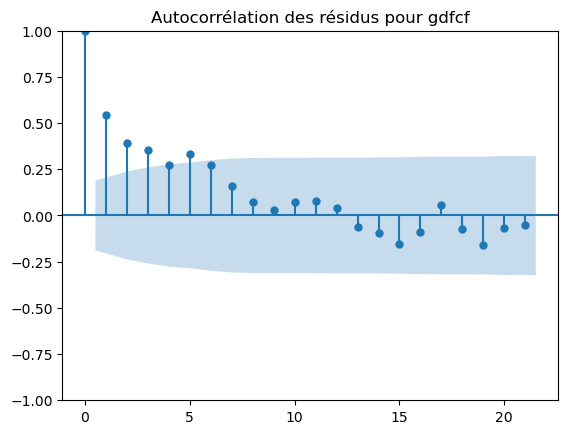

<Figure size 1000x500 with 0 Axes>

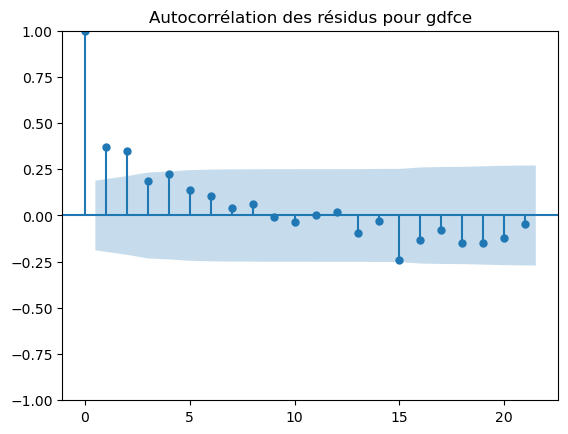

In [134]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# Extraction des résidus du modèle
residuals = model_fit.resid  # residuals est un numpy array

# DataFrame vide pour stocker les résultats
ljung_box_results = pd.DataFrame()

# Test de Ljung-Box pour chaque variable et chaque lag de 1 à 12
for i, column in enumerate(df.columns):
    for lag in range(1, 13):
        ljung_box = acorr_ljungbox(residuals[:, i], lags=[lag], return_df=True)
        # Ajout des résultats dans le DataFrame
        ljung_box_results.loc[column, f'lag_{lag}'] = ljung_box['lb_pvalue'].values[0]

# Affichage des résultats
print('--- Résultats du test de Ljung-Box ---')
print(ljung_box_results)

# Affichage des autocorrélations des résidus
for i, column in enumerate(df.columns):
    plt.figure(figsize=(10, 5))
    plot_acf(residuals[:, i])
    plt.title(f'Autocorrélation des résidus pour {column}')
    plt.show()


🔍 Analyse des résidus pour rgnp :
⚠️ Lag 1 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 2 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 3 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 4 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 5 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 6 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 7 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 8 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 9 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 10 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 11 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ Lag 12 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌

🔍 Analyse des résidus pour pgnp :
⚠️ Lag 1 : p-value = 0.0000 (< 0.05) → Autocorrélation significative ❌
⚠️ L

<Figure size 1000x500 with 0 Axes>

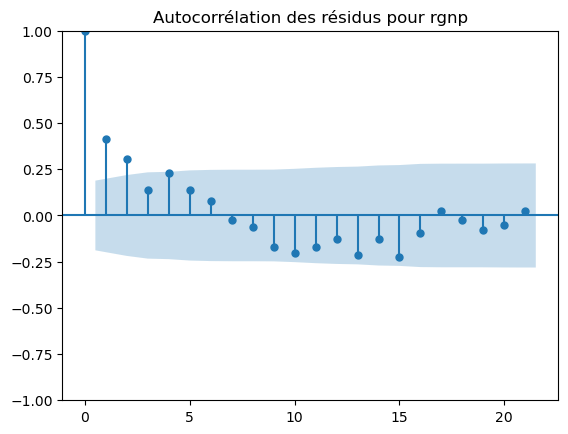

<Figure size 1000x500 with 0 Axes>

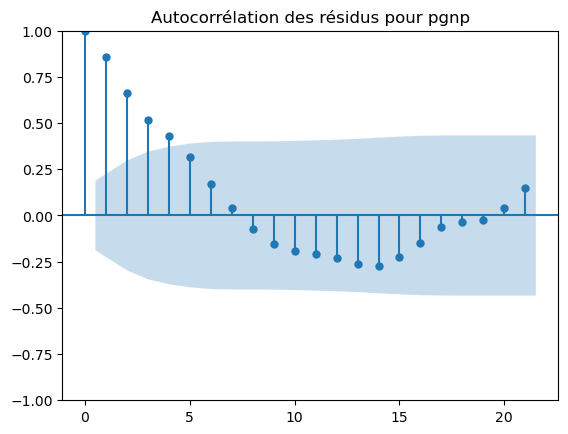

<Figure size 1000x500 with 0 Axes>

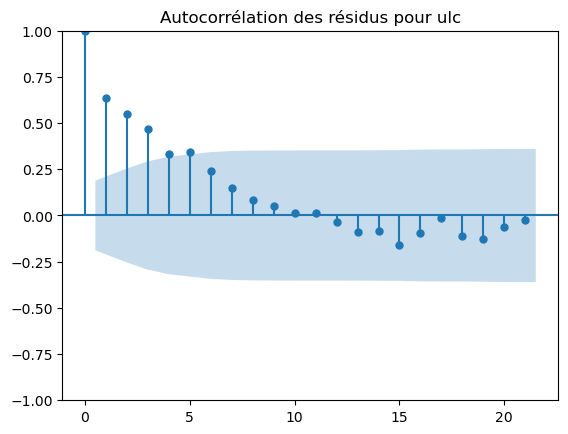

<Figure size 1000x500 with 0 Axes>

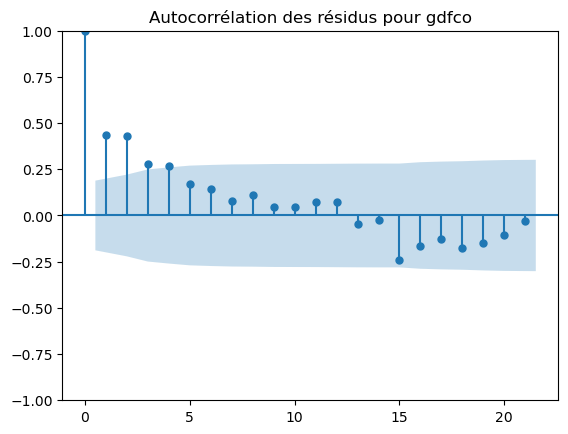

<Figure size 1000x500 with 0 Axes>

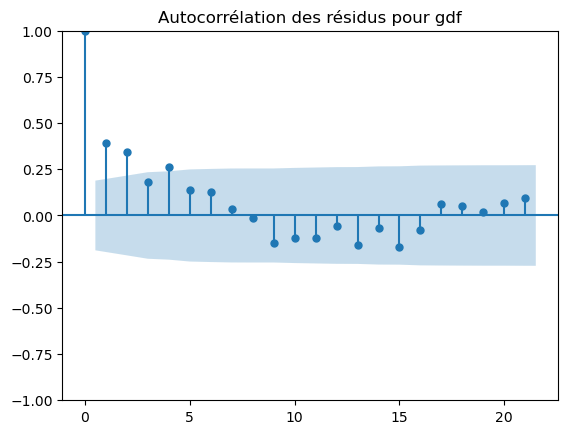

<Figure size 1000x500 with 0 Axes>

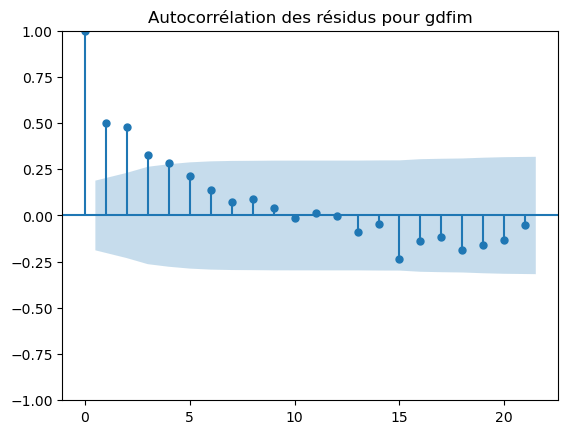

<Figure size 1000x500 with 0 Axes>

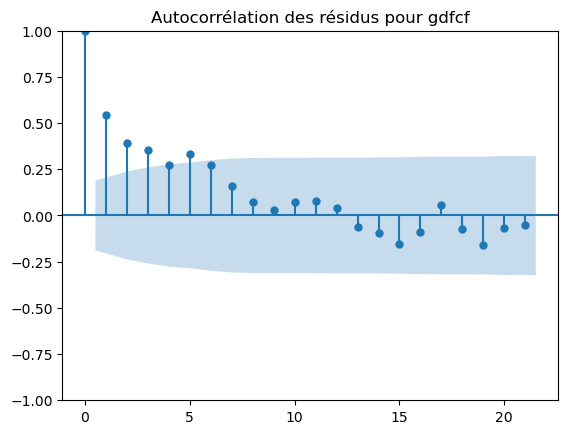

<Figure size 1000x500 with 0 Axes>

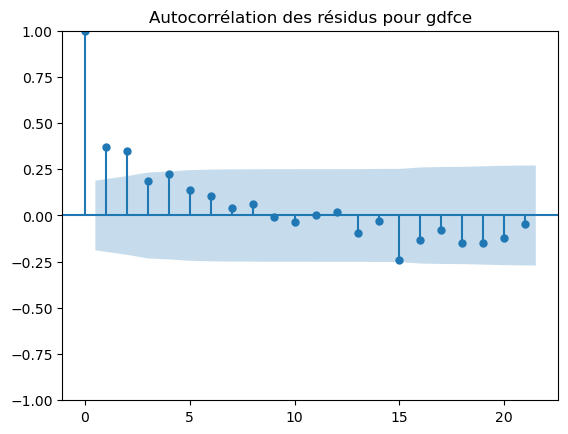

In [136]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# Définition du seuil de signification
alpha = 0.05  

# Extraction des résidus du modèle
residuals = model_fit.resid  # residuals est un numpy array

# DataFrame vide pour stocker les résultats
ljung_box_results = pd.DataFrame()

# Test de Ljung-Box pour chaque variable et chaque lag de 1 à 12
for i, column in enumerate(df.columns):
    print(f"\n🔍 Analyse des résidus pour {column} :")
    
    for lag in range(1, 13):
        ljung_box = acorr_ljungbox(residuals[:, i], lags=[lag], return_df=True)
        p_value = ljung_box['lb_pvalue'].values[0]
        
        # Stockage des résultats dans le DataFrame
        ljung_box_results.loc[column, f'lag_{lag}'] = p_value

        # Interprétation du test de Ljung-Box
        if p_value < alpha:
            print(f"⚠️ Lag {lag} : p-value = {p_value:.4f} (< {alpha}) → Autocorrélation significative ❌")
        else:
            print(f"✅ Lag {lag} : p-value = {p_value:.4f} (≥ {alpha}) → Pas d'autocorrélation détectée ✔️")

# Affichage des résultats finaux sous forme de tableau
print("\n--- Résultats du test de Ljung-Box ---")
print(ljung_box_results)

# Affichage des autocorrélations des résidus
for i, column in enumerate(df.columns):
    plt.figure(figsize=(10, 5))
    plot_acf(residuals[:, i])
    plt.title(f'Autocorrélation des résidus pour {column}')
    plt.show()
